<a href="https://colab.research.google.com/github/chorltonm/fa-cup-upsets/blob/main/notebooks/models/logistic_regression_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Import general python libaries
import os
import json
import pandas as pd
import numpy as np
import importlib

# Google Cloud libraries
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import drive
from google.colab import userdata
import pandas_gbq

# Scikit Learn libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Other
from matplotlib import pyplot
import seaborn as sns


In [17]:
# Mount Google Drive
drive.mount('/content/drive')

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/python_files')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Import user defined python functions
import model_evaluation_functions
importlib.reload(model_evaluation_functions)
from model_evaluation_functions import create_model_results_df

In [19]:
# Authentication credentials and keys

# Google Service Account

# Load the JSON key from local Google Collab file
key = json.load(open('/content/drive/MyDrive/service_account.json', 'r'))

# Authenticate using the loaded key
credentials = service_account.Credentials.from_service_account_info(key)

# Set up the BigQuery client with the credentials to project
client = bigquery.Client(credentials=credentials, project='birkbeck-msc-project-422917')

In [20]:
# Feature Data

fa_cup_raw_features = """
    select * from preparation_layer.view_fa_cup_round_3_features
"""

fa_cup_raw_features_df = client.query(fa_cup_raw_features).to_dataframe()
display(fa_cup_raw_features_df)


all_results_df = pd.DataFrame(columns=['metric_id', 'metric'])
display(all_results_df)


arena_stadium_capacity  home_team_league_level  home_win  \
0                     41837                       1         1   
1                     41837                       1         1   
2                     41837                       1         1   
3                     74879                       1         1   
4                     74879                       1         0   
..                      ...                     ...       ...   
300                    <NA>                       6         0   
301                    <NA>                       6         0   
302                    9527                       4         1   
303                    6064                       6         0   
304                    4100                       6         1   

     home_team_round_3_position  home_team_massey  home_team_colley  \
0                             1                 1                 1   
1                             1                 1                 1   
2                             1                 1                 1   
3                             1                 1                 1   
4                             2                 3                 7   
..                          ...               ...               ...   
300                          64                58                64   
301                          64                58                64   
302                          64                58                64   
303                          64                58                64   
304                          64                58                64   

     home_team_keener  home_team_trueskill  home_team_borda_count  \
0                  12                    1                      1   
1                  12                    1                      1   
2                  12                    1                      1   
3                  12                    1                      1   
4                   4                    6                      5   
..                ...                  ...                    ...   
300                53                   63                     64   
301                53                   63                     64   
302                53                   63                     64   
303                53                   63                     64   
304                53                   63                     64   

     home_team_local_kemeny_optimisation  ...  match_weather_data_hours_dew  \
0                                      1  ...                           NaN   
1                                      1  ...                         34.70   
2                                      1  ...                         47.00   
3                                      1  ...                         71.20   
4                                      5  ...                           NaN   
..                                   ...  ...                           ...   
300                                   64  ...                           NaN   
301                                   64  ...                           NaN   
302                                   64  ...                         37.15   
303                                   64  ...                         41.45   
304                                   64  ...                         32.75   

     match_weather_data_hours_precip  match_weather_data_hours_snow  \
0                                NaN                            NaN   
1                              0.000                            0.0   
2                              0.000                            0.0   
3                              0.000                            NaN   
4                                NaN                            NaN   
..                               ...                            ...   
300                              NaN                            NaN   
301                      

Empty DataFrame
Columns: [metric_id, metric]
Index: []

In [21]:
def add_home_advantage(X):

    result = X.groupby(['home_team_league_level', 'away_team_league_level'])['home_win'].mean().reset_index()
    result.columns = ['home_team_league_level', 'away_team_league_level', 'home_win_factor']
    result['home_win_factor'] = result['home_win_factor'].round(3)

    X = X.merge(result, on=['home_team_league_level', 'away_team_league_level'], how='left')
    return X, 'home_win_factor'

Standard LogisticRegression round_3_position
Fold 1 Accuracy: 0.689
Fold 2 Accuracy: 0.721


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.754
Average Accuracy: 0.731
Standard LogisticRegression massey
Fold 1 Accuracy: 0.656
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.721
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.715
Standard LogisticRegression colley
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.672
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.718
Standard LogisticRegression keener
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.770
Fold 5 Accuracy: 0.738
Average Accuracy: 0.725
Standard LogisticRegression trueskill
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.656
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.738
Average Accuracy: 0.711
Standard LogisticRegression borda_count
Fold 1 Accuracy: 0.689
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.721
Standard LogisticRegression l

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression round_3_position  \
0                                         0.731   
1                                         0.731   
2                                       216.000   
3                                         7.000   
4                                        75.000   
5                                         7.000   
6                                         0.742   
7                                         0.969   
8                                         0.840   
9                                         0.500   
10                                        0.085   
11                                        0.146   
12                                        0.621   
13                                        0.527   
14                                        0.493   
15                                        0.677   
16                                        0.731   
17                                        0.654   
18                                        0.527   

   Standard LogisticRegression massey Standard LogisticRegression colley  \
0                               0.715                              0.718   
1                               0.715                              0.718   
2                             212.000                            212.000   
3                              11.000                             11.000   
4                              76.000                             75.000   
5                               6.000                              7.000   
6                               0.736                              0.739   
7                               0.951                              0.951   
8                               0.830                              0.831   
9                               0.353                              0.389   
10                              0.073                              0.085   
11                              0.121                              0.140   
12                              0.545                              0.564   
13                              0.512                              0.518   
14                              0.475                              0.486   
15                              0.633                              0.645   
16                              0.715                              0.718   
17                              0.639                              0.645   
18                              0.512                              0.518   

   Standard LogisticRegression keener Standard LogisticRegression trueskill  \
0                               0.725                                 0.711   
1                               0.725                          

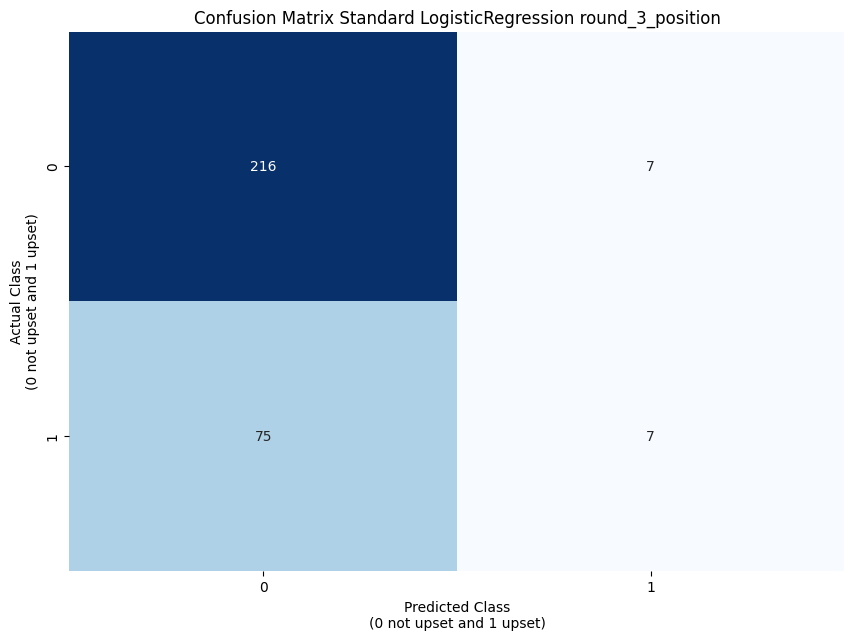

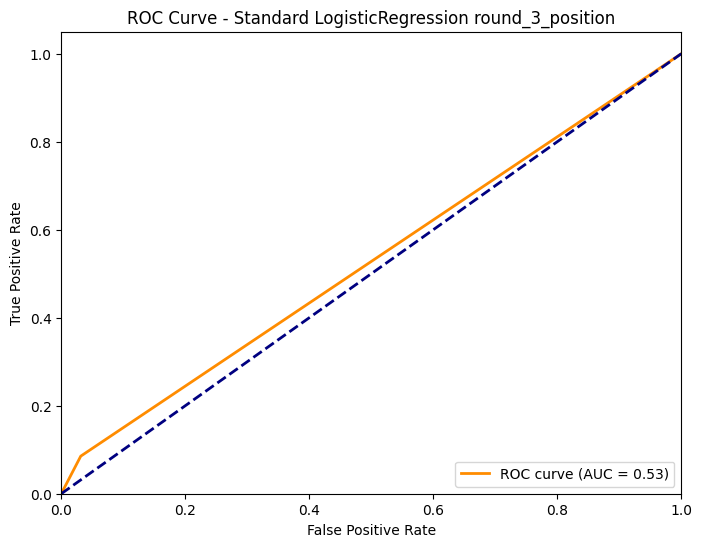

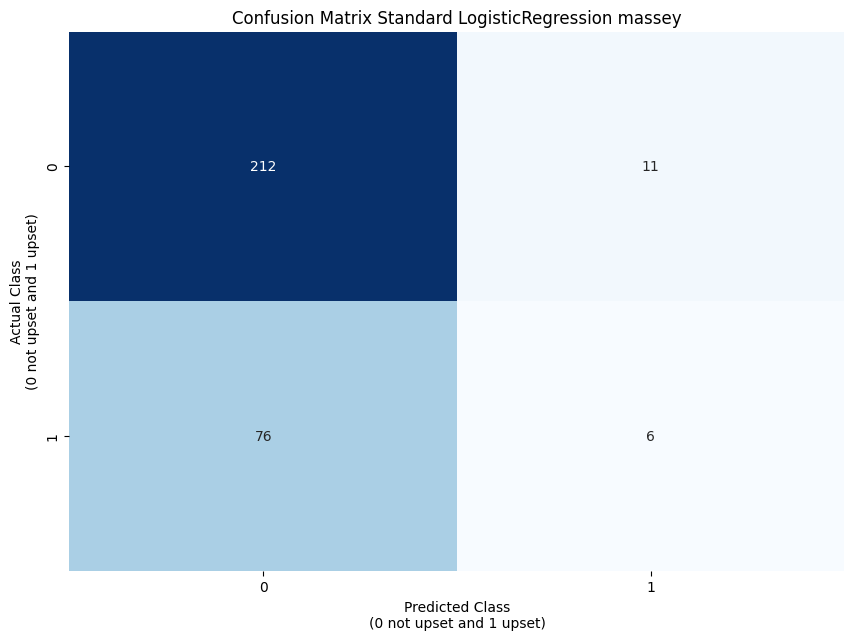

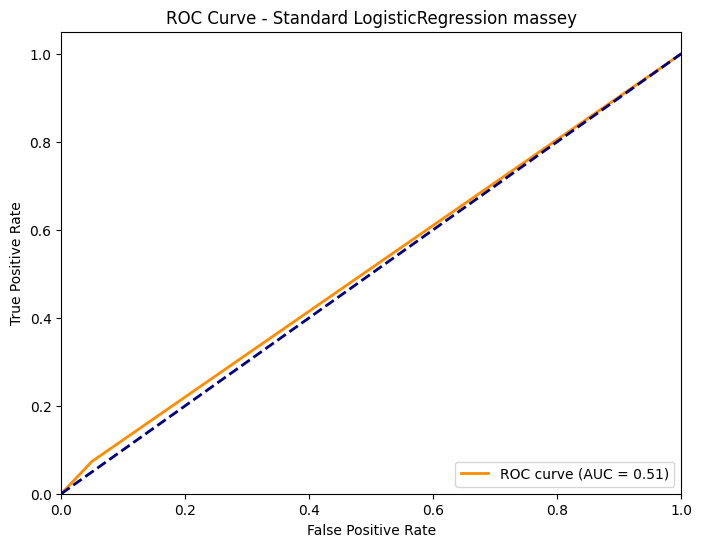

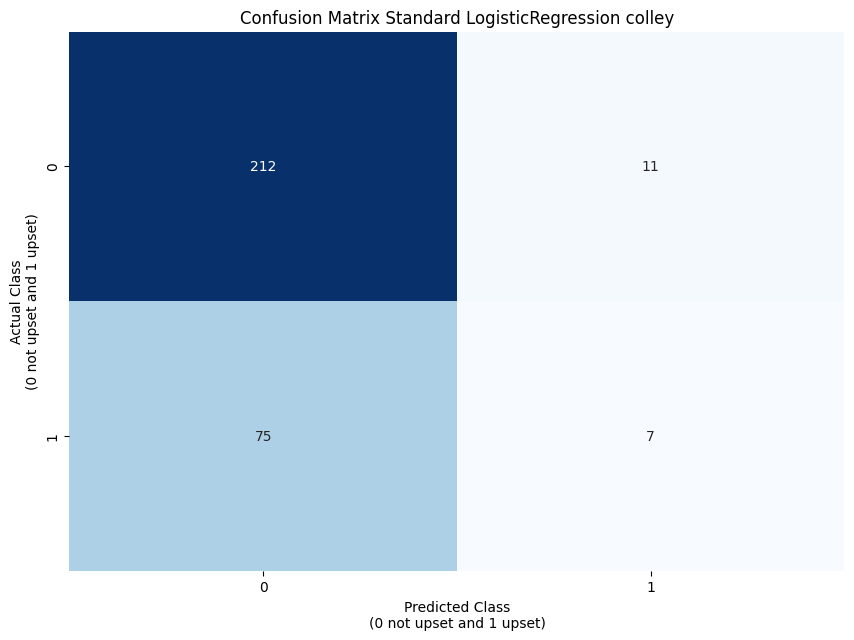

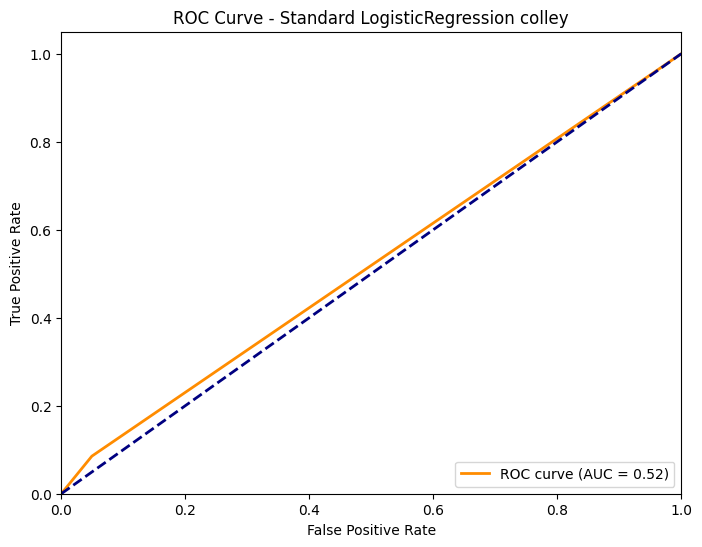

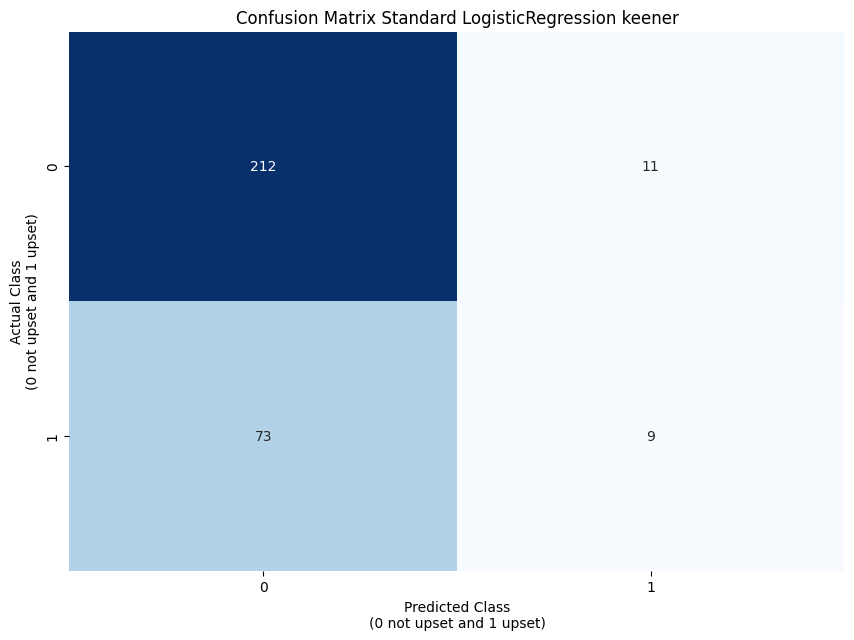

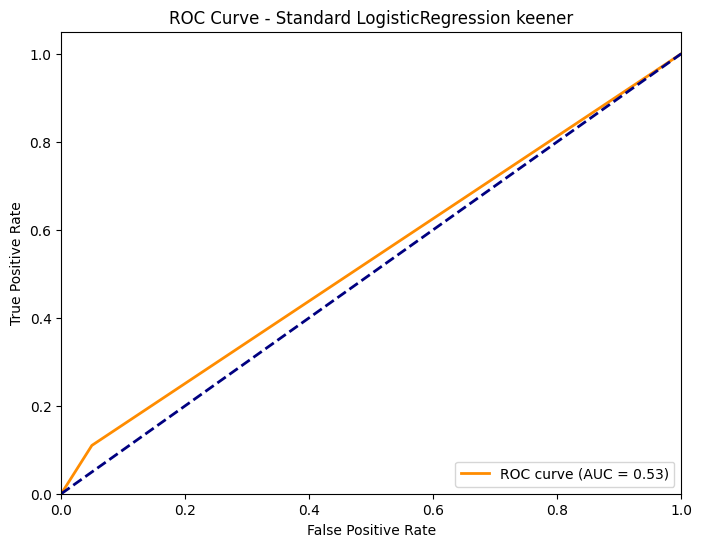

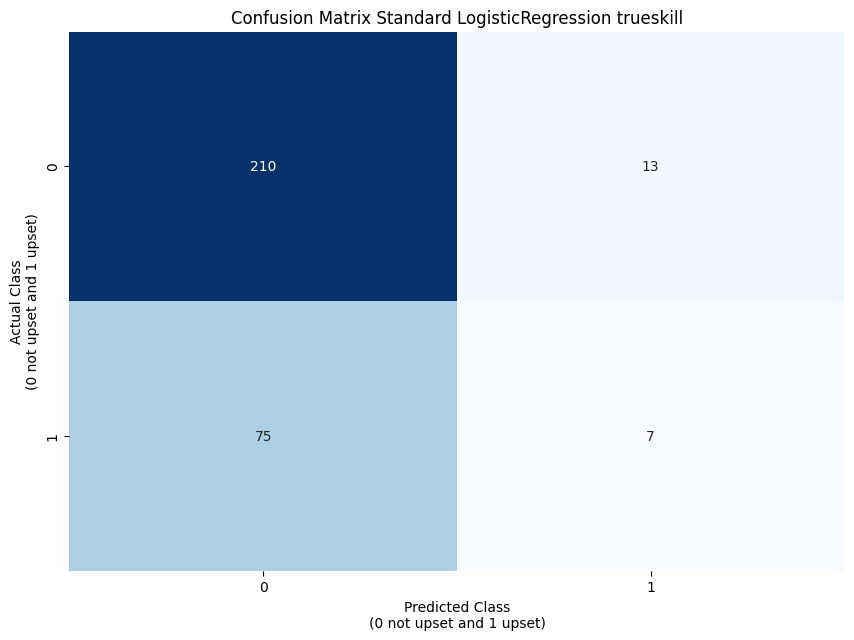

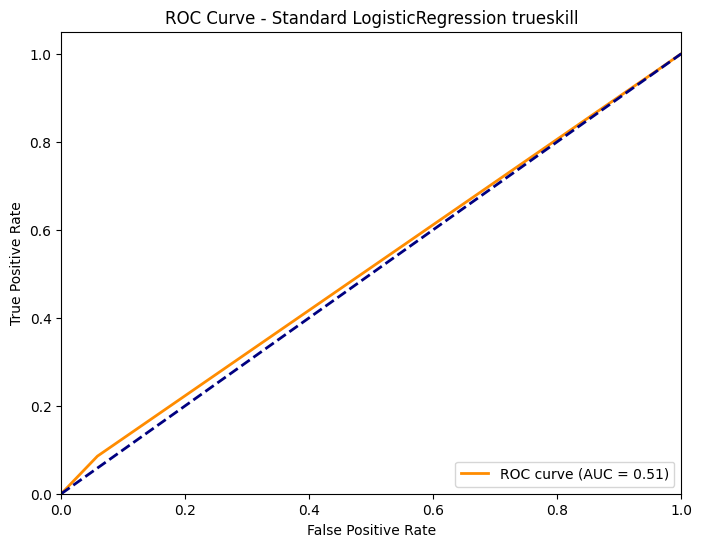

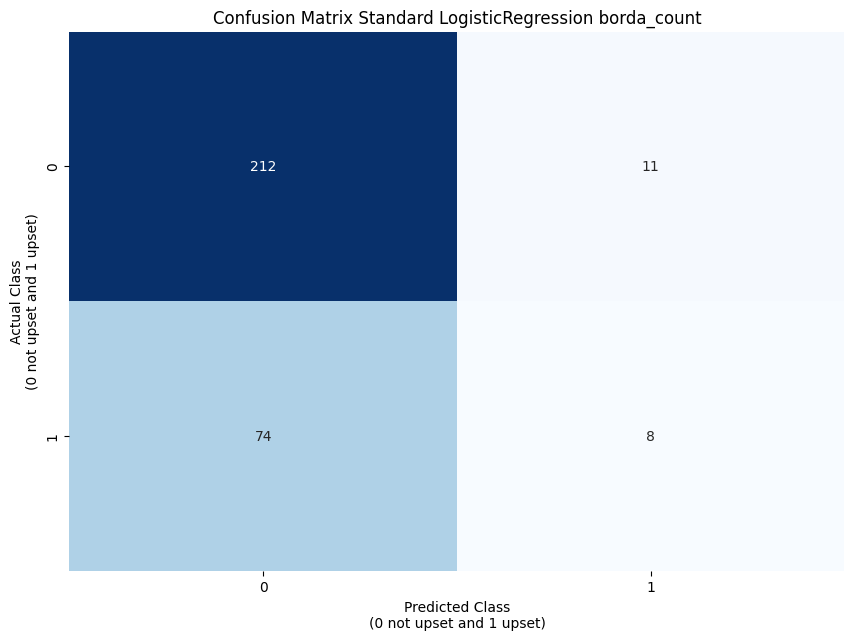

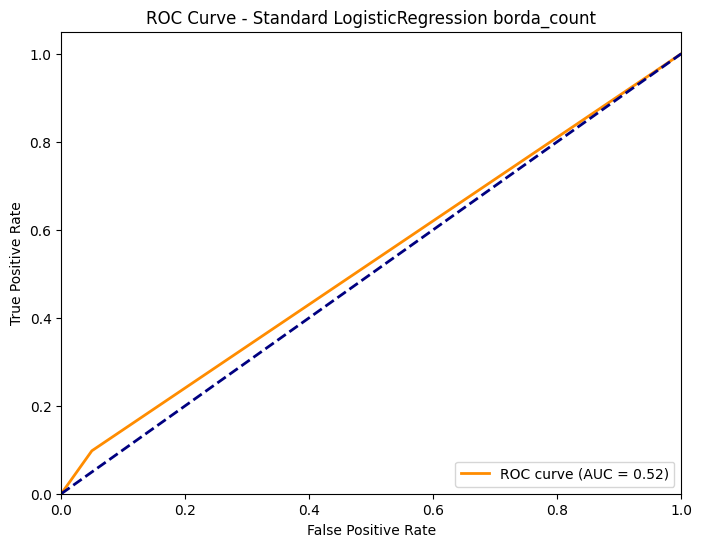

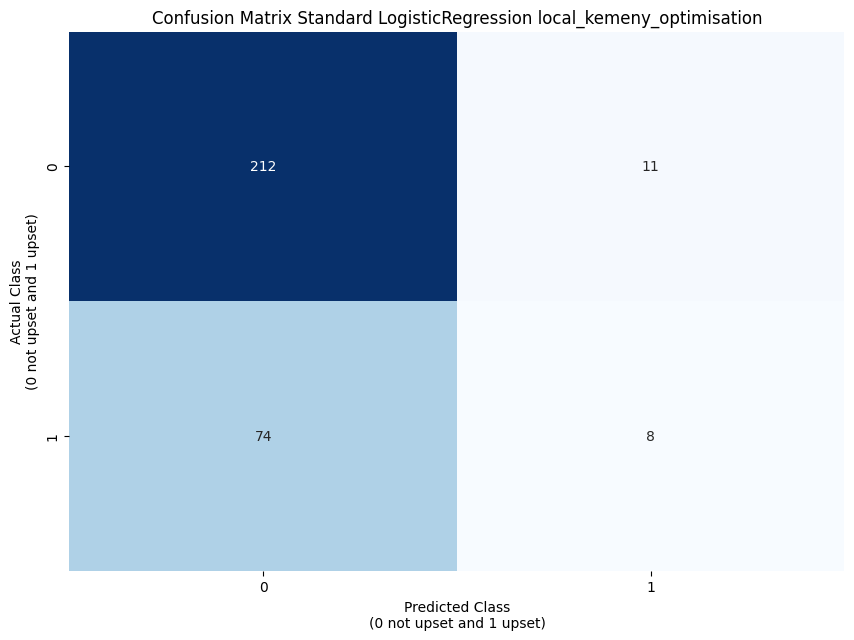

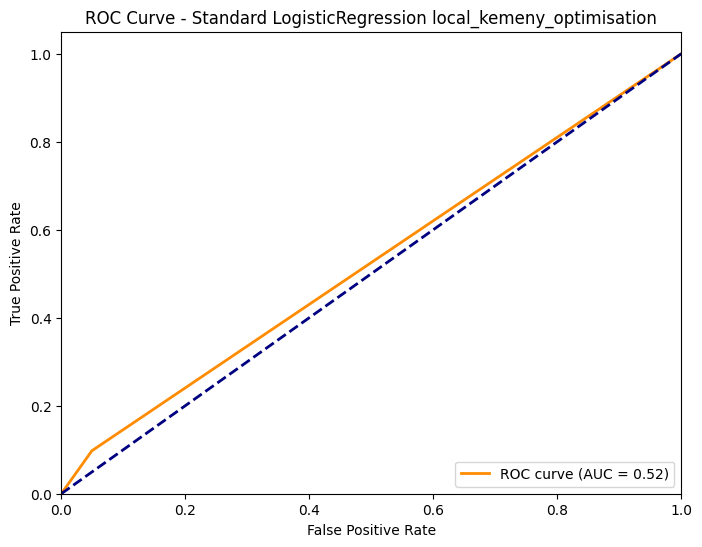

In [23]:
# Standard, no weights
model_name = "Standard LogisticRegression"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_slr = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]

# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Update preprocessor with current features including home advantage
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features),
                ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
            ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', LogisticRegression(max_iter=100))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_slr = all_results_df_slr.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_slr)


Standard LogisticRegression with home advantage round_3_position
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.738
Average Accuracy: 0.718


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Standard LogisticRegression with home advantage round_3_position  
0                                               0.718                
1                                               0.718                
2                                             215.000                
3                                               8.000                
4                                              78.000                
5                                               4.000                
6                                               0.734                
7                                               0.964                
8                                               0.833                
9                                               0.333                
10                                              0.049                
11                                              0.085                
12                                              0.534                
13                                              0.506                
14                                              0.459                
15                                              0.626                
16                                              0.718                
17                                              0.632

Standard LogisticRegression with home advantage massey
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.738
Average Accuracy: 0.718


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.718                 
1                                               0.718                 
2                                             215.000                 
3                                               8.000                 
4                                              78.000                 
5                                               4.000                 
6                                               0.734                 
7                                               0.964                 
8                                               0.833                 
9                                               0.333                 
10                                              0.049                 
11                                              0.085                 
12                                              0.534                 
13                                              0.506                 
14                                              0.459                 
15                                              0.626                 
16                                              0.718                 
17                                              0.632                 

   Standard LogisticRegression with home advantage massey  
0                                               0.718      
1                                               0.718      
2                                             213.000      
3                                              10.000      
4                                              76.000      
5                                               6.000      
6                                               0.737      
7                                               0.955      
8                                               0.832      
9                                               0.375      
10                                              0.073      
11                                              0.122      
12                                              0.556      
13                                              0.514      
14                                              0.477      
15                                              0.640      
16                                              0.718      
17                                              0.641

Standard LogisticRegression with home advantage colley
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.672
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.738
Average Accuracy: 0.711


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.718                 
1                                               0.718                 
2                                             215.000                 
3                                               8.000                 
4                                              78.000                 
5                                               4.000                 
6                                               0.734                 
7                                               0.964                 
8                                               0.833                 
9                                               0.333                 
10                                              0.049                 
11                                              0.085                 
12                                              0.534                 
13                                              0.506                 
14                                              0.459                 
15                                              0.626                 
16                                              0.718                 
17                                              0.632                 

   Standard LogisticRegression with home advantage massey  \
0                                               0.718       
1                                               0.718       
2                                             213.000       
3                                              10.000       
4                                              76.000       
5                                               6.000       
6                                               0.737       
7                                               0.955       
8                                               0.832       
9                                               0.375       
10                                              0.073       
11                                              0.122       
12                                              0.556       
13                                              0.514       
14                                              0.477       
15                                              0.640       
16                                              0.718       
17                                              0.641       

   Standard LogisticRegression with home advantage colley  
0                                               0.711      
1                                               0.711      
2                                             210.000      
3                                              13.000      
4              

Standard LogisticRegression with home advantage keener
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.721


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.718                 
1                                               0.718                 
2                                             215.000                 
3                                               8.000                 
4                                              78.000                 
5                                               4.000                 
6                                               0.734                 
7                                               0.964                 
8                                               0.833                 
9                                               0.333                 
10                                              0.049                 
11                                              0.085                 
12                                              0.534                 
13                                              0.506                 
14                                              0.459                 
15                                              0.626                 
16                                              0.718                 
17                                              0.632                 

   Standard LogisticRegression with home advantage massey  \
0                                               0.718       
1                                               0.718       
2                                             213.000       
3                                              10.000       
4                                              76.000       
5                                               6.000       
6                                               0.737       
7                                               0.955       
8                                               0.832       
9                                               0.375       
10                                              0.073       
11                                              0.122       
12                                              0.556       
13                                              0.514       
14                                              0.477       
15                                              0.640       
16                                              0.718       
17                                              0.641       

   Standard LogisticRegression with home advantage colley  \
0                                               0.711       
1                                               0.711       
2                                             210.000       
3                                              13.000       
4         

Standard LogisticRegression with home advantage trueskill
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.672
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.705
Fold 5 Accuracy: 0.738
Average Accuracy: 0.705


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.718                 
1                                               0.718                 
2                                             215.000                 
3                                               8.000                 
4                                              78.000                 
5                                               4.000                 
6                                               0.734                 
7                                               0.964                 
8                                               0.833                 
9                                               0.333                 
10                                              0.049                 
11                                              0.085                 
12                                              0.534                 
13                                              0.506                 
14                                              0.459                 
15                                              0.626                 
16                                              0.718                 
17                                              0.632                 

   Standard LogisticRegression with home advantage massey  \
0                                               0.718       
1                                               0.718       
2                                             213.000       
3                                              10.000       
4                                              76.000       
5                                               6.000       
6                                               0.737       
7                                               0.955       
8                                               0.832       
9                                               0.375       
10                                              0.073       
11                                              0.122       
12                                              0.556       
13                                              0.514       
14                                              0.477       
15                                              0.640       
16                                              0.718       
17                                              0.641       

   Standard LogisticRegression with home advantage colley  \
0                                               0.711       
1                                               0.711       
2                                             210.000       
3                                              13.000       
4         

Standard LogisticRegression with home advantage borda_count
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.738
Average Accuracy: 0.715


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.718                 
1                                               0.718                 
2                                             215.000                 
3                                               8.000                 
4                                              78.000                 
5                                               4.000                 
6                                               0.734                 
7                                               0.964                 
8                                               0.833                 
9                                               0.333                 
10                                              0.049                 
11                                              0.085                 
12                                              0.534                 
13                                              0.506                 
14                                              0.459                 
15                                              0.626                 
16                                              0.718                 
17                                              0.632                 

   Standard LogisticRegression with home advantage massey  \
0                                               0.718       
1                                               0.718       
2                                             213.000       
3                                              10.000       
4                                              76.000       
5                                               6.000       
6                                               0.737       
7                                               0.955       
8                                               0.832       
9                                               0.375       
10                                              0.073       
11                                              0.122       
12                                              0.556       
13                                              0.514       
14                                              0.477       
15                                              0.640       
16                                              0.718       
17                                              0.641       

   Standard LogisticRegression with home advantage colley  \
0                                               0.711       
1                                               0.711       
2                                             210.000       
3                                              13.000       
4         

Standard LogisticRegression with home advantage local_kemeny_optimisation
Fold 1 Accuracy: 0.672
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.738
Average Accuracy: 0.715


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.718                 
1                                               0.718                 
2                                             215.000                 
3                                               8.000                 
4                                              78.000                 
5                                               4.000                 
6                                               0.734                 
7                                               0.964                 
8                                               0.833                 
9                                               0.333                 
10                                              0.049                 
11                                              0.085                 
12                                              0.534                 
13                                              0.506                 
14                                              0.459                 
15                                              0.626                 
16                                              0.718                 
17                                              0.632                 

   Standard LogisticRegression with home advantage massey  \
0                                               0.718       
1                                               0.718       
2                                             213.000       
3                                              10.000       
4                                              76.000       
5                                               6.000       
6                                               0.737       
7                                               0.955       
8                                               0.832       
9                                               0.375       
10                                              0.073       
11                                              0.122       
12                                              0.556       
13                                              0.514       
14                                              0.477       
15                                              0.640       
16                                              0.718       
17                                              0.641       

   Standard LogisticRegression with home advantage colley  \
0                                               0.711       
1                                               0.711       
2                                             210.000       
3                                              13.000       
4         

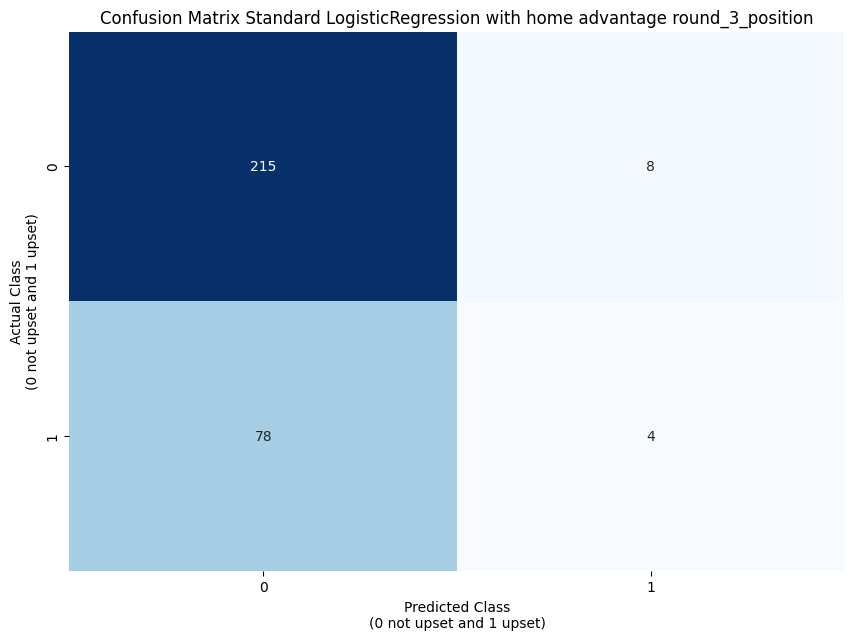

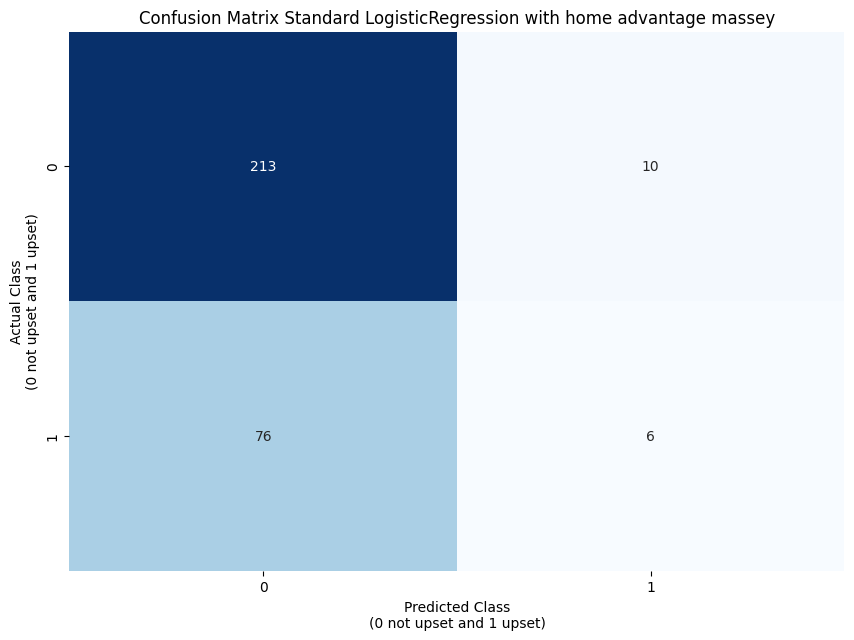

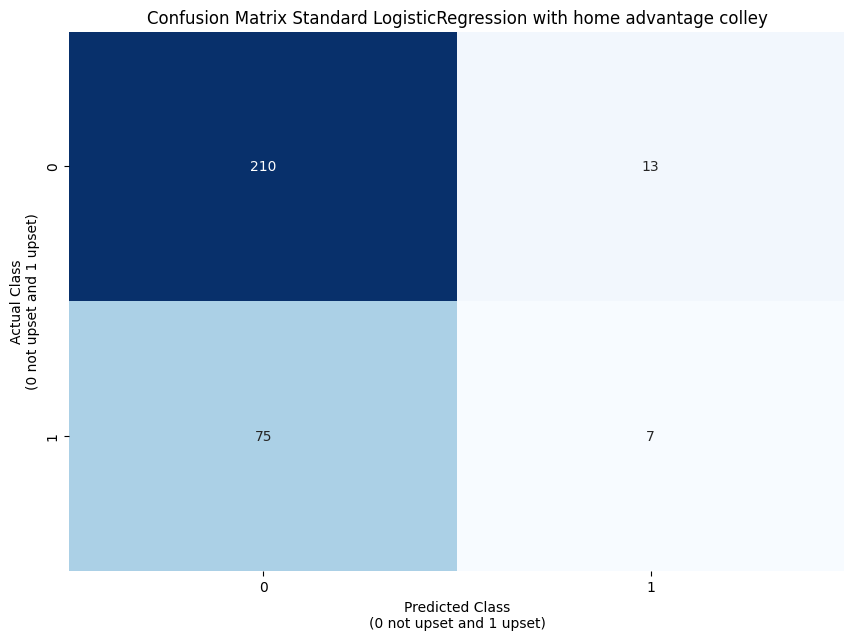

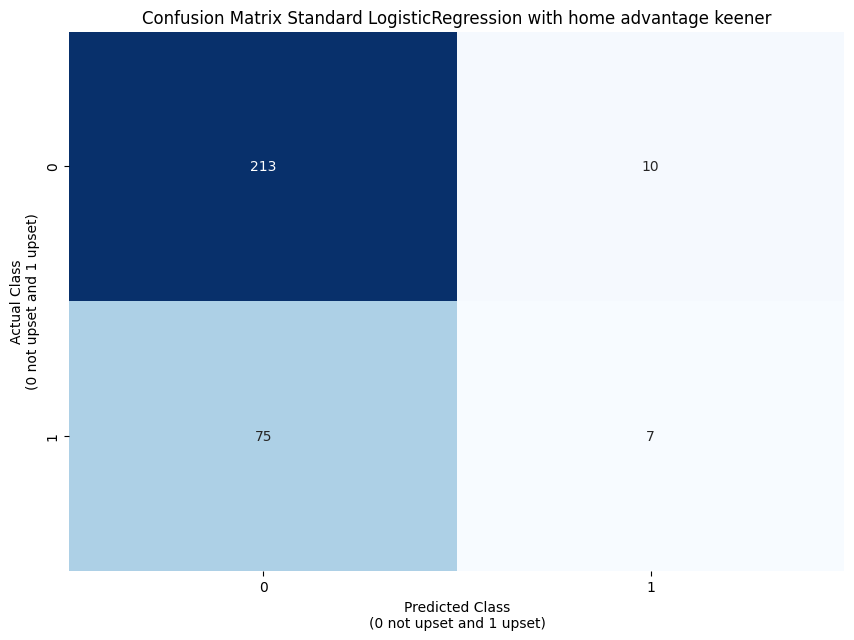

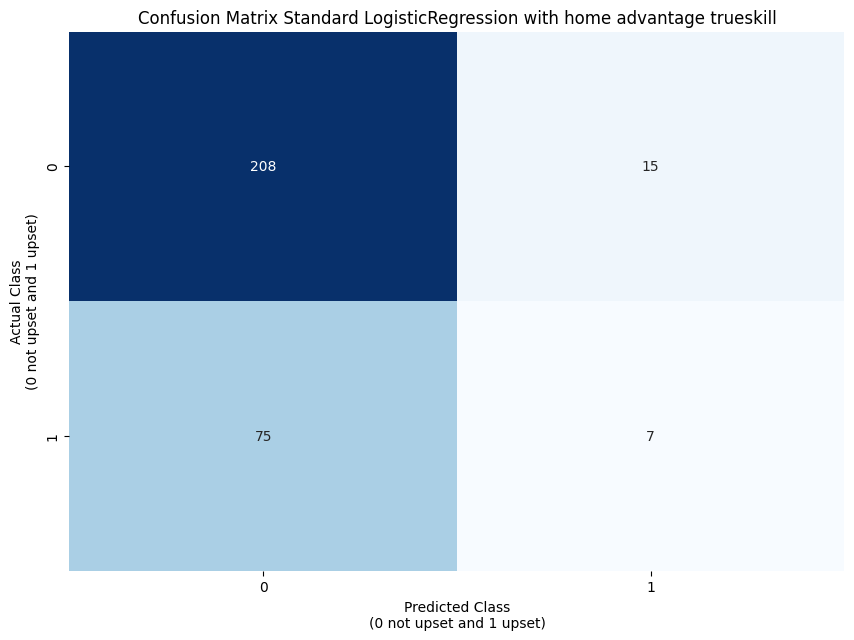

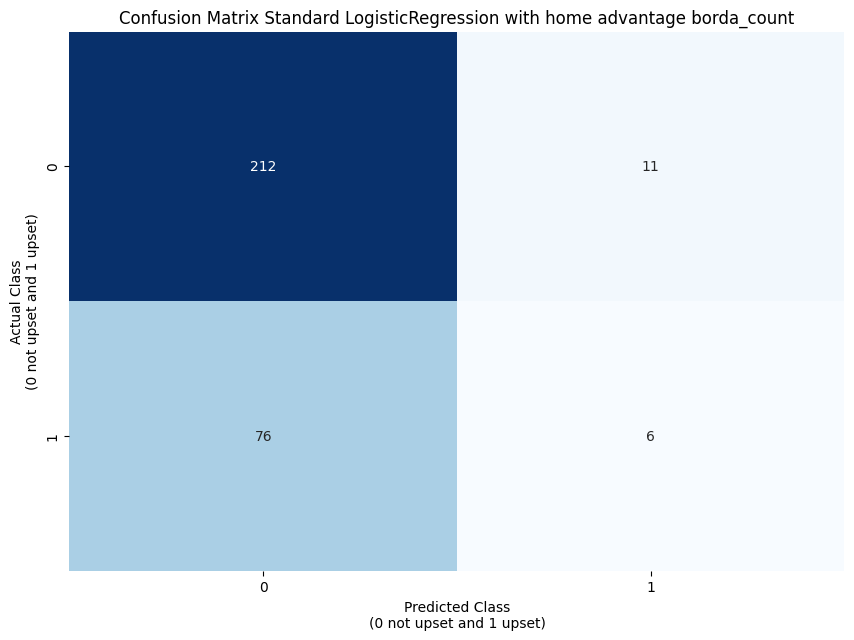

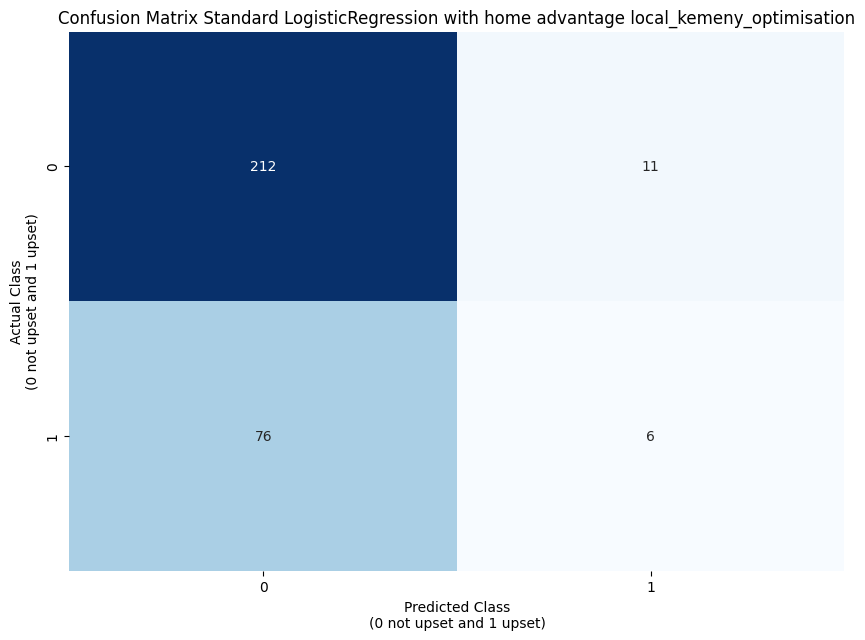

In [ ]:
# Standard, no weights
model_name = "Standard LogisticRegression with home advantage"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_slrh = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]

# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features_with_ha = [home_advantage_column] + numeric_features

        # Update preprocessor with current features including home advantage
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features_with_ha),
                ('cat', categorical_transformer, categorical_features),
                ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
            ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', LogisticRegression(max_iter=100))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(X_train_preprocessed_df)
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df= create_model_results_df(all_y_true, all_y_pred, fold_accuracies, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_slrh = all_results_df_slrh.merge(results_df, on=['metric_id', 'metric'], how='outer')

    display(all_results_df_slrh)


Weighted LogisticRegression round_3_position
Fold 1 Accuracy: 0.738
Fold 2 Accuracy: 0.492
Fold 3 Accuracy: 0.508
Fold 4 Accuracy: 0.574
Fold 5 Accuracy: 0.541
Average Accuracy: 0.570
Weighted LogisticRegression massey
Fold 1 Accuracy: 0.721
Fold 2 Accuracy: 0.475
Fold 3 Accuracy: 0.525
Fold 4 Accuracy: 0.525
Fold 5 Accuracy: 0.590
Average Accuracy: 0.567
Weighted LogisticRegression colley
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.459
Fold 3 Accuracy: 0.508
Fold 4 Accuracy: 0.492
Fold 5 Accuracy: 0.623
Average Accuracy: 0.557
Weighted LogisticRegression keener
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.459
Fold 3 Accuracy: 0.475
Fold 4 Accuracy: 0.525
Fold 5 Accuracy: 0.607
Average Accuracy: 0.554
Weighted LogisticRegression trueskill
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.492
Fold 3 Accuracy: 0.541
Fold 4 Accuracy: 0.525
Fold 5 Accuracy: 0.590
Average Accuracy: 0.570
Weighted LogisticRegression borda_count
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.443
Fold 3 Accuracy: 0.557
Fold 4 A

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Weighted LogisticRegression round_3_position  \
0                                         0.570   
1                                         0.570   
2                                       134.000   
3                                        89.000   
4                                        42.000   
5                                        40.000   
6                                         0.761   
7                                         0.601   
8                                         0.672   
9                                         0.310   
10                                        0.488   
11                                        0.379   
12                                        0.536   
13                                        0.544   
14                                        0.525   
15                                        0.640   
16                                        0.570   
17                                        0.593   

   Weighted LogisticRegression massey Weighted LogisticRegression colley  \
0                               0.567                              0.557   
1                               0.567                              0.557   
2                             134.000                            135.000   
3                              89.000                             88.000   
4                              43.000                             47.000   
5                              39.000                             35.000   
6                               0.757                              0.742   
7                               0.601                              0.605   
8                               0.670                              0.667   
9                               0.305                              0.285   
10                              0.476                              0.427   
11                              0.371                              0.341   
12                              0.531                              0.513   
13                              0.538                              0.516   
14                              0.521                              0.504   
15                              0.635                              0.619   
16                              0.567                              0.557   
17                              0.590                              0.579   

   Weighted LogisticRegression keener Weighted LogisticRegression trueskill  \
0                               0.554                                 0.570   
1                               0.554                                 0.570   
2                             132.000                               137.000   
3                              91.000                                86.000   
4              

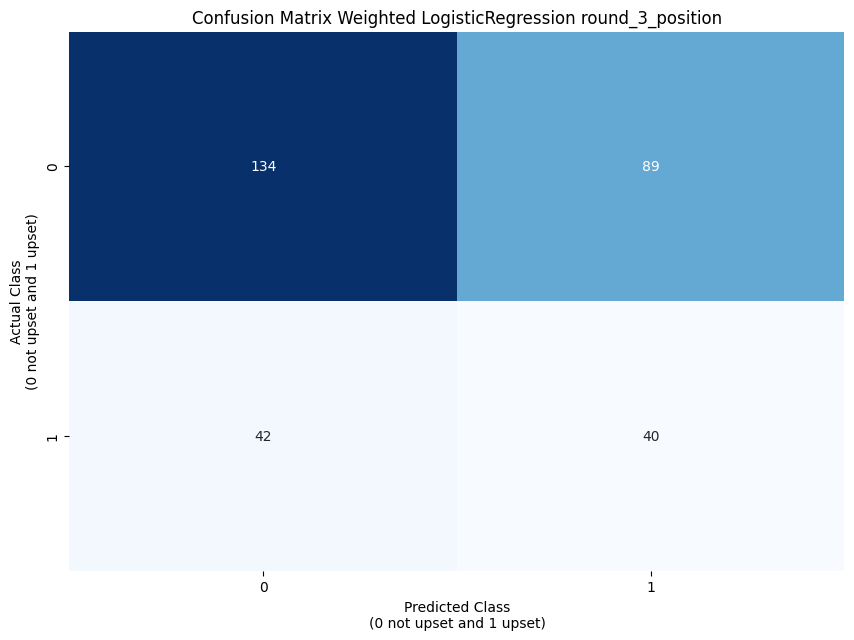

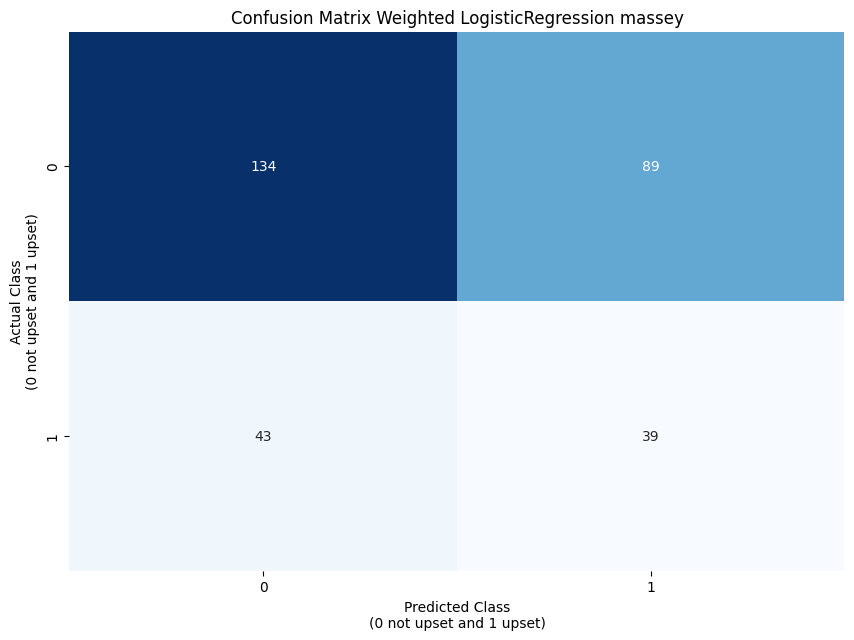

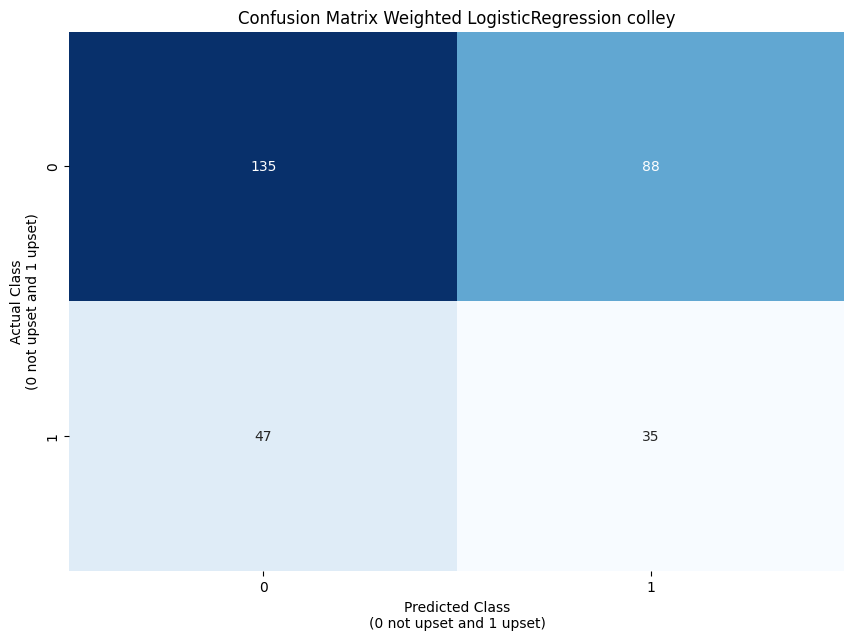

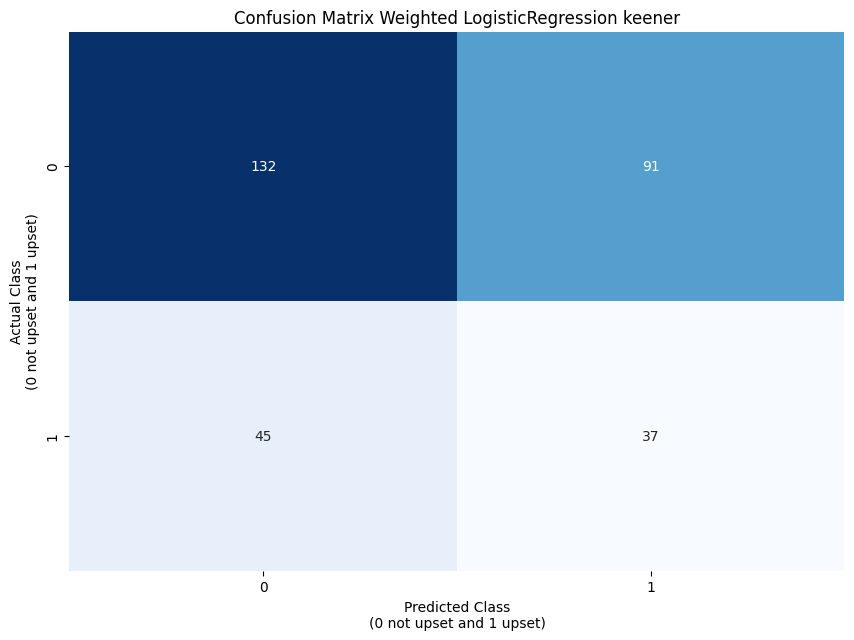

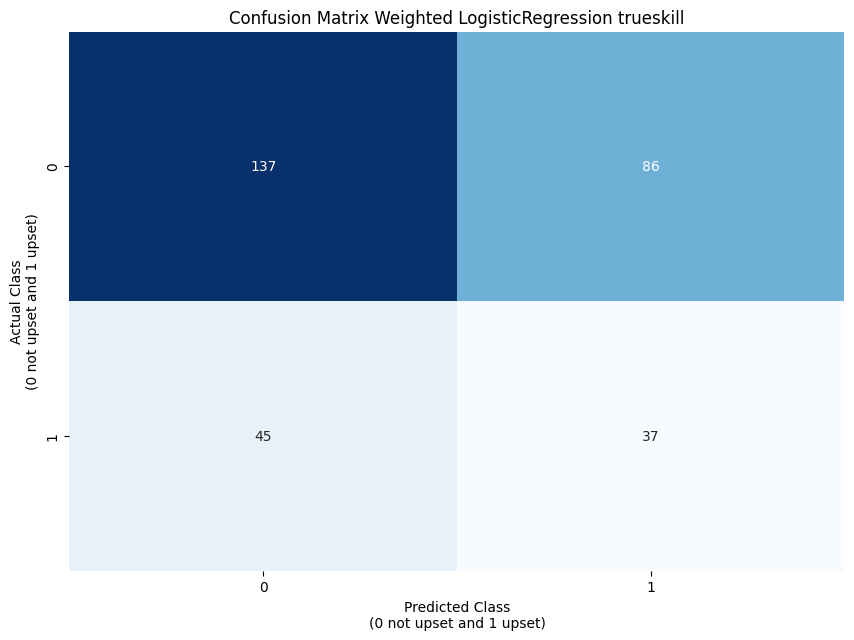

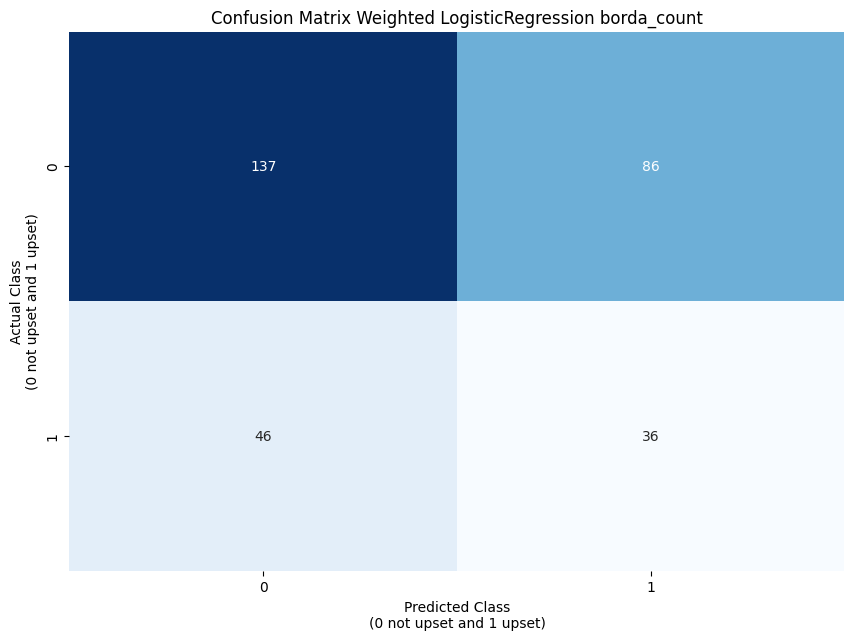

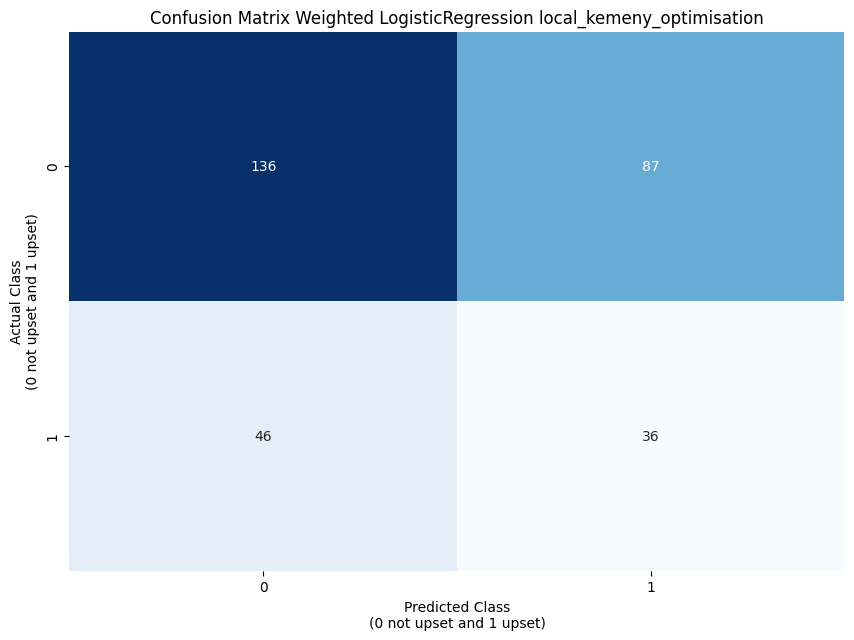

In [ ]:
# Weighted Logistc Regression
model_name = "Weighted LogisticRegression"
random_state= 47

# Function to calculate weights
def calculate_weights(y):
    class_counts = y.value_counts()
    total_samples = len(y)
    return {class_label: int(round((1 - (count / total_samples)) * 100))
            for class_label, count in class_counts.items()}

# Empty df for consolidating confusion report results
all_results_df_wlr = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Add home advantage factor
        #X_train, home_advantage_column = add_home_advantage(X_train)
        #X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        #numeric_features_with_ha = [home_advantage_column] + numeric_features
        #print(numeric_features_with_ha)

        # Update preprocessor with current features including home advantage
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features),
                ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
            ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Calculate weights using only training data
        weights = calculate_weights(y_train)

        # Create pipeline
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(class_weight=weights,max_iter=1000))
        ])


        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(pd.concat([X_train_preprocessed_df, y_train], axis=1))
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df= create_model_results_df(all_y_true, all_y_pred, fold_accuracies, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_wlr = all_results_df_wlr.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_wlr)


Weighted LogisticRegression with home advantage round_3_position
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.492
Fold 3 Accuracy: 0.508
Fold 4 Accuracy: 0.541
Fold 5 Accuracy: 0.557
Average Accuracy: 0.561
Weighted LogisticRegression with home advantage massey
Fold 1 Accuracy: 0.623
Fold 2 Accuracy: 0.475
Fold 3 Accuracy: 0.525
Fold 4 Accuracy: 0.475
Fold 5 Accuracy: 0.541
Average Accuracy: 0.528
Weighted LogisticRegression with home advantage colley
Fold 1 Accuracy: 0.656
Fold 2 Accuracy: 0.475
Fold 3 Accuracy: 0.541
Fold 4 Accuracy: 0.475
Fold 5 Accuracy: 0.590
Average Accuracy: 0.548
Weighted LogisticRegression with home advantage keener
Fold 1 Accuracy: 0.607
Fold 2 Accuracy: 0.475
Fold 3 Accuracy: 0.525
Fold 4 Accuracy: 0.508
Fold 5 Accuracy: 0.574
Average Accuracy: 0.538
Weighted LogisticRegression with home advantage trueskill
Fold 1 Accuracy: 0.623
Fold 2 Accuracy: 0.492
Fold 3 Accuracy: 0.541
Fold 4 Accuracy: 0.525
Fold 5 Accuracy: 0.607
Average Accuracy: 0.557
Weighted Logistic

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   Weighted LogisticRegression with home advantage round_3_position  \
0                                               0.561                 
1                                               0.561                 
2                                             135.000                 
3                                              88.000                 
4                                              46.000                 
5                                              36.000                 
6                                               0.746                 
7                                               0.605                 
8                                               0.668                 
9                                               0.290                 
10                                              0.439                 
11                                              0.350                 
12                                              0.518                 
13                                              0.522                 
14                                              0.509                 
15                                              0.623                 
16                                              0.561                 
17                                              0.583                 

   Weighted LogisticRegression with home advantage massey  \
0                                               0.528       
1                                               0.528       
2                                             127.000       
3                                              96.000       
4                                              48.000       
5                                              34.000       
6                                               0.726       
7                                               0.570       
8                                               0.638       
9                                               0.262       
10                                              0.415       
11                                              0.321       
12                                              0.494       
13                                              0.492       
14                                              0.479       
15                                              0.601       
16                                              0.528       
17                                              0.553       

   Weighted LogisticRegression with home advantage colley  \
0                                               0.548       
1                                               0.548       
2                                             136.000       
3                                              87.000       
4         

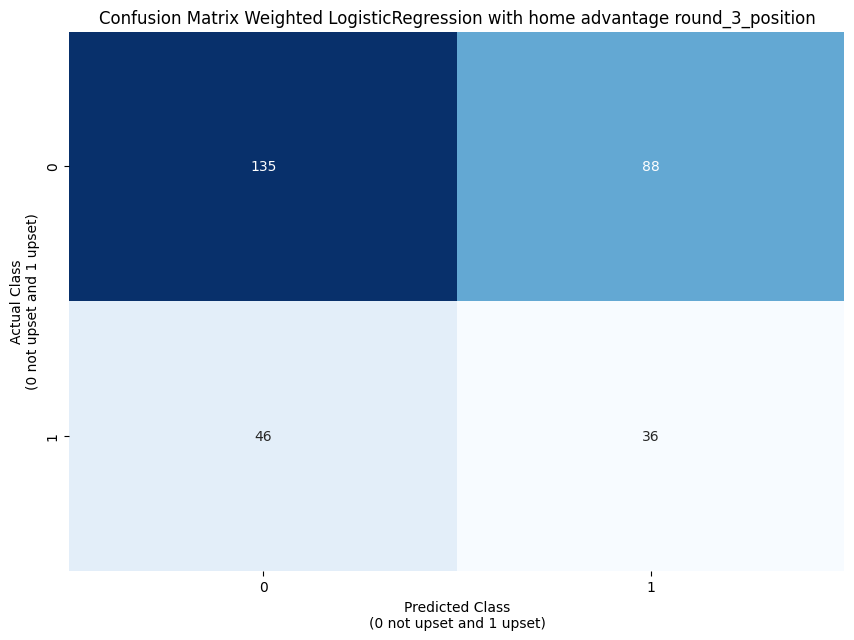

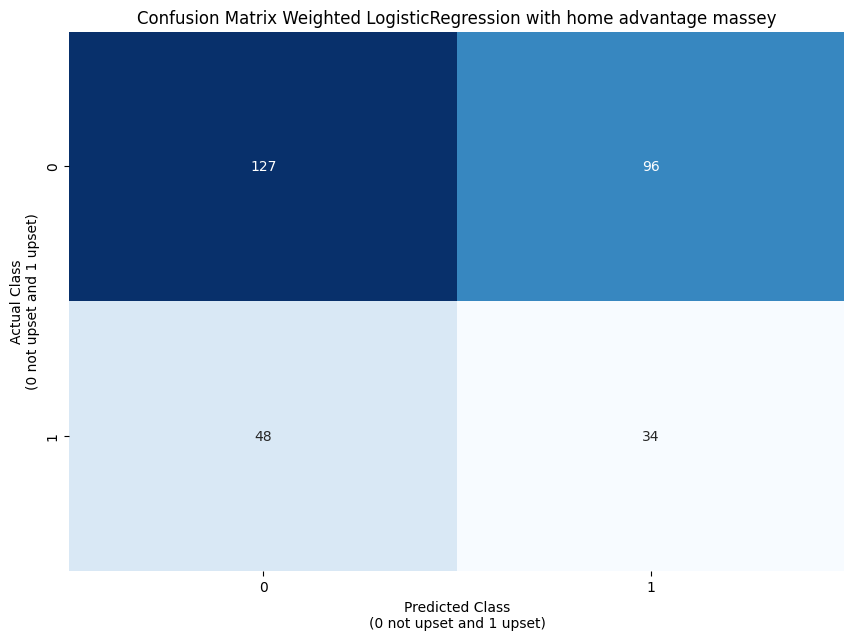

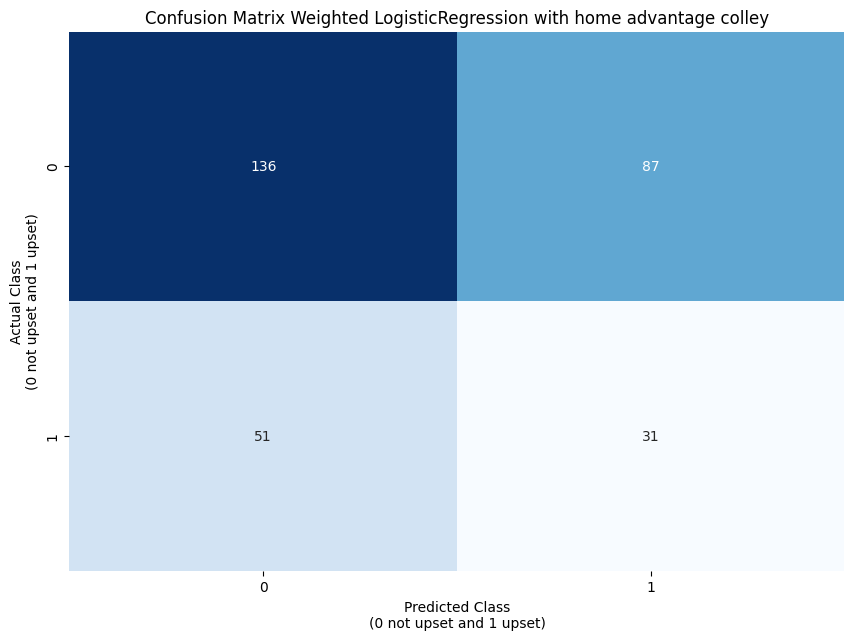

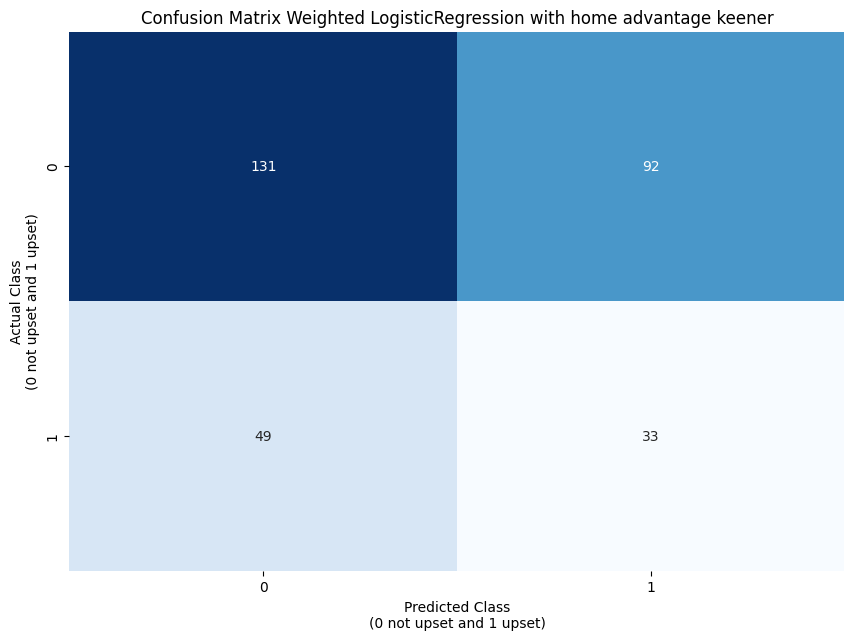

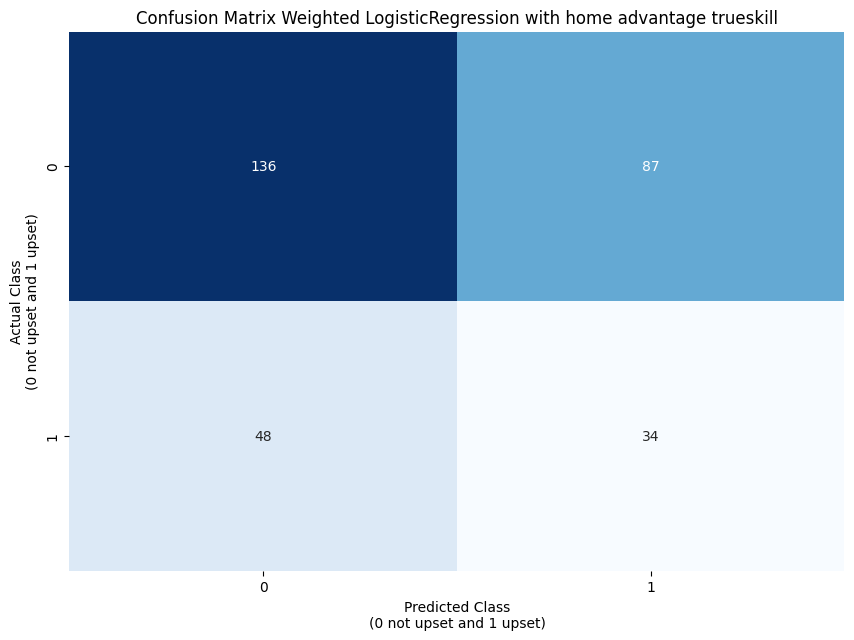

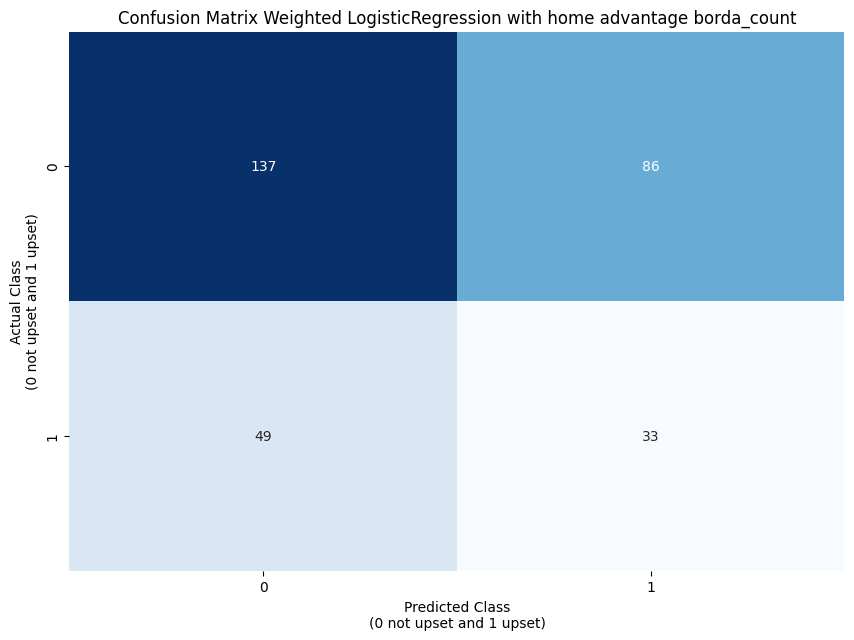

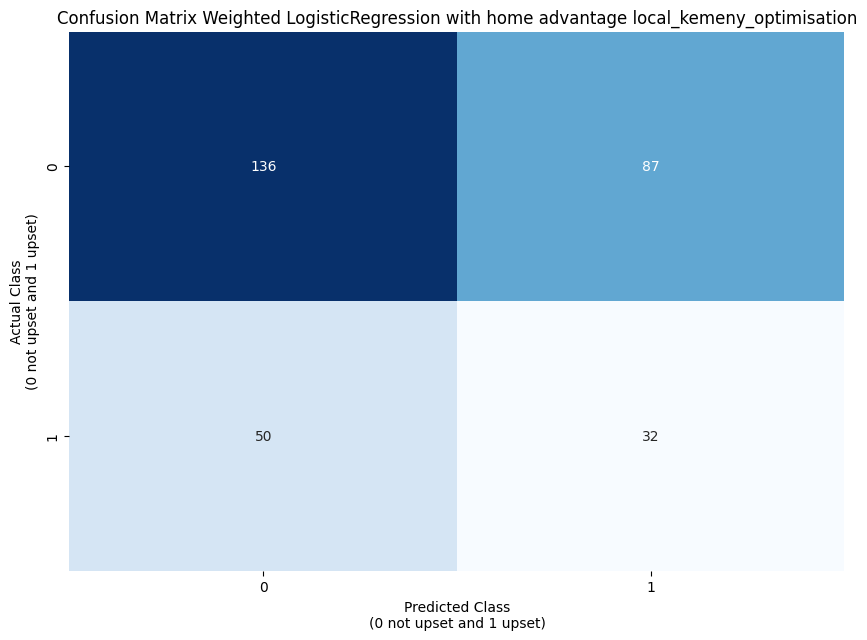

In [ ]:
# Weighted Logistc Regression
model_name = "Weighted LogisticRegression with home advantage"
random_state= 47


# Function to calculate weights
def calculate_weights(y):
    class_counts = y.value_counts()
    total_samples = len(y)
    return {class_label: int(round((1 - (count / total_samples)) * 100))
            for class_label, count in class_counts.items()}

# Empty df for consolidating confusion report results
all_results_df_wlrh = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]


        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features_with_ha = [home_advantage_column] + numeric_features

        # Update preprocessor with current features
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features_with_ha),
                ('cat', categorical_transformer, categorical_features),
                ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
            ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Calculate weights using only training data
        weights = calculate_weights(y_train)

        # Create pipeline
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(class_weight=weights,max_iter=1000))
        ])


        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(pd.concat([X_train_preprocessed_df, y_train], axis=1))
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df= create_model_results_df(all_y_true, all_y_pred, fold_accuracies, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_wlrh = all_results_df_wlrh.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_wlrh)


MLP Classifier Neural Network round_3_position

Fold 1
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
6                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
1                0.858974               0.000000   
2                0.935897               0.000000   
3                0.858974               0.000000   
4                0.839744               0.807229   
6                0.839744               0.000000   
..                    ...                    ...   
300              0.839744               0.000000   
301              0.839744               0.000000   
302              0.961538               0.265060   
303              0.000000               0.000000   
304              0.839744               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
6                               1.000000   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.469880  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
1                                                  0.0     
2                                                  1.0     
3                                                  1.0     
4                                                  0.0     
6                                                  1.0     
..                                                 ...     
300                                                0.0     
301                                                0.0     
302 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
5                  0.583381                     0.0       1.0   
11                 0.583381                     0.0       1.0   
13                 0.690950                     0.0       1.0   
14                 0.388549                     0.0       1.0   
..                      ...                     ...       ...   
289                0.264656                     0.6       1.0   
293                0.036164                     0.8       0.0   
294                0.091929                     0.8       1.0   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.839744               0.867470   
5                0.807692               0.674699   
11               0.705128               0.867470   
13               0.839744               0.867470   
14               0.871795               1.000000   
..                    ...                    ...   
289              0.897436               0.000000   
293              0.839744               0.000000   
294              0.839744               0.000000   
298              0.839744               0.000000   
299              0.839744               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
5                               0.792208   
11                              1.000000   
13                              0.714286   
14                              1.000000   
..                                   ...   
289                             0.000000   
293                             0.857143   
294                             0.428571   
298                             0.428571   
299                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
5                                      0.0                     0.2   
11                                     0.0                     0.2   
13                                     0.0                     0.6   
14                                     0.0                     0.2   
..                                     ...                     ...   
289                                    1.0                     0.0   
293                                    0.0                     0.2   
294                                    0.0                     0.2   
298                                    0.0                     0.0   
299                                    1.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
5                0.671233               0.734940  ...   
11               0.821918               0.000000  ...   
13               0.794521               0.867470  ...   
14               0.863014               0.265060  ...   
..                    ...                    ...  ...   
289              0.739726               0.530120  ...   
293              0.602740               0.000000  ...   
294              0.863014               0.397590  ...   
298              0.794521               0.000000  ...   
299              0.698630               0.867470  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
5                                                  1.0     
11                                                 0.0     
13                                                 1.0     
14                                                 0.0     
..                                                 ...     
289                                                0.0     
293                                                1.0     
294 

Fold 1 Accuracy: 0.984

Fold 2
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.439313                     0.0       1.0   
1                  0.439313                     0.0       1.0   
2                  0.439313                     0.0       1.0   
3                  0.823970                     0.0       1.0   
4                  0.823970                     0.0       0.0   
..                      ...                     ...       ...   
299                0.013970                     0.8       1.0   
301                0.260128                     1.0       0.0   
302                0.063178                     0.6       1.0   
303                0.022864                     1.0       0.0   
304                0.000000                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
299              0.752941               0.000000   
301              0.752941               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
299                             0.285714   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
299                                    1.0                     0.2   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
..                    ...                    ...  ...   
299              0.698630               0.867470  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
299                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
10                 0.328428                     0.0       1.0   
12                 0.573923                     0.0       1.0   
19                 0.683935                     0.0       1.0   
33                 0.674040                     0.0       1.0   
36                 0.683935                     0.0       1.0   
..                      ...                     ...       ...   
283                0.260128                     0.8       0.0   
291                0.012107                     0.8       0.0   
295                0.063399                     0.8       0.0   
297                0.004680                     0.8       0.0   
300               -0.022701                     1.0       0.0   

     home_lineup_strength  home_team_league_form  \
10               0.847059                0.00000   
12               0.905882                0.00000   
19               0.788235                0.86747   
33               0.752941                0.60241   
36               0.635294                0.00000   
..                    ...                    ...   
283              0.752941                1.00000   
291              0.752941                0.00000   
295              0.752941                0.39759   
297              0.835294                0.26506   
300              0.752941                0.00000   

     home_team_league_form_home_and_away  \
10                              0.428571   
12                              0.649351   
19                              0.857143   
33                              0.571429   
36                              0.428571   
..                                   ...   
283                             1.000000   
291                             0.285714   
295                             0.350649   
297                             0.350649   
300                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
10                                     0.0                     0.2   
12                                     0.0                     0.2   
19                                     0.0                     0.4   
33                                     0.0                     0.2   
36                                     0.0                     0.2   
..                                     ...                     ...   
283                                    0.0                     0.2   
291                                    0.0                     0.2   
295                                    0.0                     0.2   
297                                    1.0                     0.2   
300                                    0.0                     0.0   

     away_lineup_strength  away_team_league_form  ...  \
10               0.849315               0.337349  ...   
12               0.876712               0.000000  ...   
19               0.671233               0.807229  ...   
33               0.794521               0.674699  ...   
36               0.726027               0.469880  ...   
..                    ...                    ...  ...   
283              0.684932               0.000000  ...   
291              0.794521               0.000000  ...   
295              0.794521               0.469880  ...   
297              0.849315               0.265060  ...   
300              0.726027               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
10                                                 0.0              
12                                                 0.0              
19                                                 0.0              
33                                                 0.0              
36                                                 0.0              
..                                                 ...              
283                                                0.0       

Fold 2 Accuracy: 0.967

Fold 3
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
..                      ...                     ...       ...   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
298              0.752941               0.000000   
299              0.752941               0.000000   
300              0.752941               0.000000   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.816901               0.072289  ...   
1                0.859155               0.602410  ...   
2                0.802817               0.674699  ...   
3                0.605634               0.000000  ...   
4                0.816901               0.000000  ...   
..                    ...                    ...  ...   
298              0.816901               0.000000  ...   
299              0.718310               0.867470  ...   
300              0.746479               0.000000  ...   
303              0.760563               0.397590  ...   
304              0.816901               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
298                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
7                  0.583381                     0.0       1.0   
8                  0.827877                     0.0       1.0   
9                  0.583381                     0.0       1.0   
16                 0.583381                     0.0       1.0   
21                 0.451759                     0.0       1.0   
..                      ...                     ...       ...   
276                0.049516                     0.6       0.0   
281                0.089357                     0.6       0.0   
284                0.089357                     0.8       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
7                0.776471               0.867470   
8                0.729412               0.000000   
9                0.847059               0.807229   
16               0.800000               0.807229   
21               0.717647               0.530120   
..                    ...                    ...   
276              0.752941               0.000000   
281              0.811765               0.734940   
284              0.752941               0.469880   
301              0.752941               0.000000   
302              0.882353               0.265060   

     home_team_league_form_home_and_away  \
7                               0.857143   
8                               0.571429   
9                               0.571429   
16                              0.792208   
21                              0.649351   
..                                   ...   
276                             0.350649   
281                             0.714286   
284                             0.792208   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
7                                      0.0                     0.2   
8                                      0.0                     0.2   
9                                      0.0                     0.2   
16                                     0.0                     0.6   
21                                     0.0                     0.2   
..                                     ...                     ...   
276                                    0.0                     0.4   
281                                    1.0                     0.2   
284                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
7                0.887324               0.530120  ...   
8                0.943662               0.000000  ...   
9                0.915493               0.000000  ...   
16               0.845070               0.000000  ...   
21               0.788732               0.000000  ...   
..                    ...                    ...  ...   
276              0.816901               0.602410  ...   
281              0.788732               0.469880  ...   
284              0.845070               0.000000  ...   
301              0.760563               0.674699  ...   
302              0.661972               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
7                                                  0.0              
8                                                  0.0              
9                                                  0.0              
16                                                 0.0              
21                                                 0.0              
..                                                 ...              
276                                                0.0       

Fold 3 Accuracy: 0.951

Fold 4
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
4                  0.827877                     0.0       0.0   
5                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
298                0.276551                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
301                0.276551                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.729730               0.867470   
1                0.756757               0.000000   
2                0.837838               0.000000   
4                0.729730               0.807229   
5                0.702703               0.674699   
..                    ...                    ...   
298              0.729730               0.000000   
299              0.729730               0.000000   
300              0.729730               0.000000   
301              0.729730               0.000000   
302              0.864865               0.265060   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
4                               0.571429   
5                               0.792208   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
5                                      0.0                     0.2   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
0                0.791667               0.072289  ...   
1                0.833333               0.602410  ...   
2                0.777778               0.674699  ...   
4                0.791667               0.000000  ...   
5                0.666667               0.734940  ...   
..                    ...                    ...  ...   
298              0.791667               0.000000  ...   
299              0.694444               0.867470  ...   
300              0.722222               0.000000  ...   
301              0.736111               0.674699  ...   
302              0.638889               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
1                                                  0.0     
2                                                  1.0     
4                                                  0.0     
5                                                  1.0     
..                                                 ...     
298                                                0.0     
299                                                1.0     
300 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
3                  0.827877                     0.0       1.0   
27                 0.425965                     0.0       1.0   
28                 0.827877                     0.0       1.0   
35                 0.827877                     0.0       1.0   
48                 0.265293                     0.0       0.0   
..                      ...                     ...       ...   
285                0.049516                     0.8       0.0   
288                0.276551                     0.6       1.0   
292                0.045350                     0.8       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
3                0.756757               0.000000   
27               0.729730               0.000000   
28               0.783784               0.530120   
35               0.689189               0.000000   
48               0.554054               0.000000   
..                    ...                    ...   
285              0.729730               0.734940   
288              0.905405               0.397590   
292              0.729730               0.807229   
303             -0.148649               0.000000   
304              0.729730               0.000000   

     home_team_league_form_home_and_away  \
3                               0.857143   
27                              0.649351   
28                              0.207792   
35                              0.792208   
48                              0.350649   
..                                   ...   
285                             0.714286   
288                             0.493506   
292                             0.857143   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
3                                      0.0                     0.2   
27                                     0.0                     0.2   
28                                     0.0                     0.4   
35                                     0.0                     0.2   
48                                     1.0                     0.2   
..                                     ...                     ...   
285                                    1.0                     0.0   
288                                    1.0                     0.2   
292                                    0.0                     0.2   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
3                0.583333               0.000000  ...   
27               0.791667               0.000000  ...   
28               0.777778               0.602410  ...   
35               0.652778               0.000000  ...   
48               0.555556               0.000000  ...   
..                    ...                    ...  ...   
285              0.722222               0.265060  ...   
288              0.638889               0.000000  ...   
292              0.791667               0.204819  ...   
303              0.736111               0.397590  ...   
304              0.791667               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
3                                                  1.0     
27                                                 1.0     
28                                                 1.0     
35                                                 1.0     
48                                                 0.0     
..                                                 ...     
285                                                0.0     
288                                                0.0     
292 

Fold 4 Accuracy: 0.967

Fold 5
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.545683                     0.0       1.0   
3                  1.000000                     0.0       1.0   
5                  0.704671                     0.0       1.0   
7                  0.704671                     0.0       1.0   
8                  1.000000                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.323805                     1.0       0.0   
302                0.101431                     0.6       1.0   
303                0.053816                     1.0       0.0   
304                0.026812                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.764706               0.867470   
3                0.788235               0.000000   
5                0.741176               0.674699   
7                0.776471               0.867470   
8                0.729412               0.000000   
..                    ...                    ...   
300              0.764706               0.000000   
301              0.764706               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.764706               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
3                               0.857143   
5                               0.792208   
7                               0.857143   
8                               0.571429   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
3                                      0.0                     0.2   
5                                      0.0                     0.2   
7                                      0.0                     0.2   
8                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.083333  ...   
3                0.589041               0.000000  ...   
5                0.671233               0.847222  ...   
7                0.863014               0.611111  ...   
8                0.917808               0.000000  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.777778  ...   
302              0.643836               0.930556  ...   
303              0.739726               0.458333  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
3                                                  0.0              
5                                                  0.0              
7                                                  0.0              
8                                                  0.0              
..                                                 ...              
300                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.545683                     0.0       1.0   
2                  0.545683                     0.0       1.0   
4                  1.000000                     0.0       0.0   
6                  0.704671                     0.0       1.0   
18                 0.545683                     0.0       1.0   
..                      ...                     ...       ...   
274                0.198504                     0.6       0.0   
275                0.323805                     0.8       1.0   
286                0.323805                     0.6       0.0   
290                0.119498                     0.8       0.0   
296                0.220710                     0.6       0.0   

     home_lineup_strength  home_team_league_form  \
1                0.788235               0.000000   
2                0.858824               0.000000   
4                0.764706               0.807229   
6                0.764706               0.000000   
18               0.764706               0.000000   
..                    ...                    ...   
274              0.800000               0.000000   
275              0.764706               0.602410   
286              0.764706               0.000000   
290              0.800000               0.000000   
296              0.741176               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
4                               0.571429   
6                               1.000000   
18                              0.350649   
..                                   ...   
274                             0.285714   
275                             0.649351   
286                             0.207792   
290                             0.714286   
296                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
18                                     0.0                     0.2   
..                                     ...                     ...   
274                                    1.0                     0.0   
275                                    1.0                     1.0   
286                                    0.0                     0.2   
290                                    0.0                     0.0   
296                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.694444  ...   
2                0.780822               0.777778  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.541667  ...   
18               0.794521               0.000000  ...   
..                    ...                    ...  ...   
274              0.739726               0.930556  ...   
275              0.794521               0.000000  ...   
286              0.794521               0.000000  ...   
290              0.876712               0.777778  ...   
296              0.684932               0.541667  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
1                                                  0.0              
2                                                  0.0              
4                                                  0.0              
6                                                  0.0              
18                                                 0.0              
..                                                 ...              
274                                                0.0       

Fold 5 Accuracy: 0.902
Average Accuracy: 0.954
MLP Classifier Neural Network massey

Fold 1
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
6                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
1                0.858974               0.000000   
2                0.935897               0.000000   
3                0.858974               0.000000   
4                0.839744               0.807229   
6                0.839744               0.000000   
..                    ...                    ...   
300              0.839744               0.000000   
301              0.839744               0.000000   
302              0.961538               0.265060   
303              0.000000               0.000000   
304              0.839744               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
6                               1.000000   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.469880  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
1                                                  0.0     
2                                                  1.0     
3                                                  1.0     
4                                                  0.0     
6                                                  1.0     
..                                                 ...     
300                                                0.0     
301                                                0.0     
302 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
5                  0.583381                     0.0       1.0   
11                 0.583381                     0.0       1.0   
13                 0.690950                     0.0       1.0   
14                 0.388549                     0.0       1.0   
..                      ...                     ...       ...   
289                0.264656                     0.6       1.0   
293                0.036164                     0.8       0.0   
294                0.091929                     0.8       1.0   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.839744               0.867470   
5                0.807692               0.674699   
11               0.705128               0.867470   
13               0.839744               0.867470   
14               0.871795               1.000000   
..                    ...                    ...   
289              0.897436               0.000000   
293              0.839744               0.000000   
294              0.839744               0.000000   
298              0.839744               0.000000   
299              0.839744               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
5                               0.792208   
11                              1.000000   
13                              0.714286   
14                              1.000000   
..                                   ...   
289                             0.000000   
293                             0.857143   
294                             0.428571   
298                             0.428571   
299                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
5                                      0.0                     0.2   
11                                     0.0                     0.2   
13                                     0.0                     0.6   
14                                     0.0                     0.2   
..                                     ...                     ...   
289                                    1.0                     0.0   
293                                    0.0                     0.2   
294                                    0.0                     0.2   
298                                    0.0                     0.0   
299                                    1.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
5                0.671233               0.734940  ...   
11               0.821918               0.000000  ...   
13               0.794521               0.867470  ...   
14               0.863014               0.265060  ...   
..                    ...                    ...  ...   
289              0.739726               0.530120  ...   
293              0.602740               0.000000  ...   
294              0.863014               0.397590  ...   
298              0.794521               0.000000  ...   
299              0.698630               0.867470  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
5                                                  1.0     
11                                                 0.0     
13                                                 1.0     
14                                                 0.0     
..                                                 ...     
289                                                0.0     
293                                                1.0     
294 

Fold 1 Accuracy: 0.984

Fold 2
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.439313                     0.0       1.0   
1                  0.439313                     0.0       1.0   
2                  0.439313                     0.0       1.0   
3                  0.823970                     0.0       1.0   
4                  0.823970                     0.0       0.0   
..                      ...                     ...       ...   
299                0.013970                     0.8       1.0   
301                0.260128                     1.0       0.0   
302                0.063178                     0.6       1.0   
303                0.022864                     1.0       0.0   
304                0.000000                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
299              0.752941               0.000000   
301              0.752941               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
299                             0.285714   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
299                                    1.0                     0.2   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
..                    ...                    ...  ...   
299              0.698630               0.867470  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
299                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
10                 0.328428                     0.0       1.0   
12                 0.573923                     0.0       1.0   
19                 0.683935                     0.0       1.0   
33                 0.674040                     0.0       1.0   
36                 0.683935                     0.0       1.0   
..                      ...                     ...       ...   
283                0.260128                     0.8       0.0   
291                0.012107                     0.8       0.0   
295                0.063399                     0.8       0.0   
297                0.004680                     0.8       0.0   
300               -0.022701                     1.0       0.0   

     home_lineup_strength  home_team_league_form  \
10               0.847059                0.00000   
12               0.905882                0.00000   
19               0.788235                0.86747   
33               0.752941                0.60241   
36               0.635294                0.00000   
..                    ...                    ...   
283              0.752941                1.00000   
291              0.752941                0.00000   
295              0.752941                0.39759   
297              0.835294                0.26506   
300              0.752941                0.00000   

     home_team_league_form_home_and_away  \
10                              0.428571   
12                              0.649351   
19                              0.857143   
33                              0.571429   
36                              0.428571   
..                                   ...   
283                             1.000000   
291                             0.285714   
295                             0.350649   
297                             0.350649   
300                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
10                                     0.0                     0.2   
12                                     0.0                     0.2   
19                                     0.0                     0.4   
33                                     0.0                     0.2   
36                                     0.0                     0.2   
..                                     ...                     ...   
283                                    0.0                     0.2   
291                                    0.0                     0.2   
295                                    0.0                     0.2   
297                                    1.0                     0.2   
300                                    0.0                     0.0   

     away_lineup_strength  away_team_league_form  ...  \
10               0.849315               0.337349  ...   
12               0.876712               0.000000  ...   
19               0.671233               0.807229  ...   
33               0.794521               0.674699  ...   
36               0.726027               0.469880  ...   
..                    ...                    ...  ...   
283              0.684932               0.000000  ...   
291              0.794521               0.000000  ...   
295              0.794521               0.469880  ...   
297              0.849315               0.265060  ...   
300              0.726027               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
10                                                 0.0              
12                                                 0.0              
19                                                 0.0              
33                                                 0.0              
36                                                 0.0              
..                                                 ...              
283                                                0.0       

Fold 2 Accuracy: 0.951

Fold 3
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
..                      ...                     ...       ...   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
298              0.752941               0.000000   
299              0.752941               0.000000   
300              0.752941               0.000000   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.816901               0.072289  ...   
1                0.859155               0.602410  ...   
2                0.802817               0.674699  ...   
3                0.605634               0.000000  ...   
4                0.816901               0.000000  ...   
..                    ...                    ...  ...   
298              0.816901               0.000000  ...   
299              0.718310               0.867470  ...   
300              0.746479               0.000000  ...   
303              0.760563               0.397590  ...   
304              0.816901               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
298                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
7                  0.583381                     0.0       1.0   
8                  0.827877                     0.0       1.0   
9                  0.583381                     0.0       1.0   
16                 0.583381                     0.0       1.0   
21                 0.451759                     0.0       1.0   
..                      ...                     ...       ...   
276                0.049516                     0.6       0.0   
281                0.089357                     0.6       0.0   
284                0.089357                     0.8       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
7                0.776471               0.867470   
8                0.729412               0.000000   
9                0.847059               0.807229   
16               0.800000               0.807229   
21               0.717647               0.530120   
..                    ...                    ...   
276              0.752941               0.000000   
281              0.811765               0.734940   
284              0.752941               0.469880   
301              0.752941               0.000000   
302              0.882353               0.265060   

     home_team_league_form_home_and_away  \
7                               0.857143   
8                               0.571429   
9                               0.571429   
16                              0.792208   
21                              0.649351   
..                                   ...   
276                             0.350649   
281                             0.714286   
284                             0.792208   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
7                                      0.0                     0.2   
8                                      0.0                     0.2   
9                                      0.0                     0.2   
16                                     0.0                     0.6   
21                                     0.0                     0.2   
..                                     ...                     ...   
276                                    0.0                     0.4   
281                                    1.0                     0.2   
284                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
7                0.887324               0.530120  ...   
8                0.943662               0.000000  ...   
9                0.915493               0.000000  ...   
16               0.845070               0.000000  ...   
21               0.788732               0.000000  ...   
..                    ...                    ...  ...   
276              0.816901               0.602410  ...   
281              0.788732               0.469880  ...   
284              0.845070               0.000000  ...   
301              0.760563               0.674699  ...   
302              0.661972               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
7                                                  0.0              
8                                                  0.0              
9                                                  0.0              
16                                                 0.0              
21                                                 0.0              
..                                                 ...              
276                                                0.0       

Fold 3 Accuracy: 0.951

Fold 4
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
4                  0.827877                     0.0       0.0   
5                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
298                0.276551                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
301                0.276551                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.729730               0.867470   
1                0.756757               0.000000   
2                0.837838               0.000000   
4                0.729730               0.807229   
5                0.702703               0.674699   
..                    ...                    ...   
298              0.729730               0.000000   
299              0.729730               0.000000   
300              0.729730               0.000000   
301              0.729730               0.000000   
302              0.864865               0.265060   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
4                               0.571429   
5                               0.792208   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
5                                      0.0                     0.2   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
0                0.791667               0.072289  ...   
1                0.833333               0.602410  ...   
2                0.777778               0.674699  ...   
4                0.791667               0.000000  ...   
5                0.666667               0.734940  ...   
..                    ...                    ...  ...   
298              0.791667               0.000000  ...   
299              0.694444               0.867470  ...   
300              0.722222               0.000000  ...   
301              0.736111               0.674699  ...   
302              0.638889               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
1                                                  0.0     
2                                                  1.0     
4                                                  0.0     
5                                                  1.0     
..                                                 ...     
298                                                0.0     
299                                                1.0     
300 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
3                  0.827877                     0.0       1.0   
27                 0.425965                     0.0       1.0   
28                 0.827877                     0.0       1.0   
35                 0.827877                     0.0       1.0   
48                 0.265293                     0.0       0.0   
..                      ...                     ...       ...   
285                0.049516                     0.8       0.0   
288                0.276551                     0.6       1.0   
292                0.045350                     0.8       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
3                0.756757               0.000000   
27               0.729730               0.000000   
28               0.783784               0.530120   
35               0.689189               0.000000   
48               0.554054               0.000000   
..                    ...                    ...   
285              0.729730               0.734940   
288              0.905405               0.397590   
292              0.729730               0.807229   
303             -0.148649               0.000000   
304              0.729730               0.000000   

     home_team_league_form_home_and_away  \
3                               0.857143   
27                              0.649351   
28                              0.207792   
35                              0.792208   
48                              0.350649   
..                                   ...   
285                             0.714286   
288                             0.493506   
292                             0.857143   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
3                                      0.0                     0.2   
27                                     0.0                     0.2   
28                                     0.0                     0.4   
35                                     0.0                     0.2   
48                                     1.0                     0.2   
..                                     ...                     ...   
285                                    1.0                     0.0   
288                                    1.0                     0.2   
292                                    0.0                     0.2   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
3                0.583333               0.000000  ...   
27               0.791667               0.000000  ...   
28               0.777778               0.602410  ...   
35               0.652778               0.000000  ...   
48               0.555556               0.000000  ...   
..                    ...                    ...  ...   
285              0.722222               0.265060  ...   
288              0.638889               0.000000  ...   
292              0.791667               0.204819  ...   
303              0.736111               0.397590  ...   
304              0.791667               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
3                                                  1.0     
27                                                 1.0     
28                                                 1.0     
35                                                 1.0     
48                                                 0.0     
..                                                 ...     
285                                                0.0     
288                                                0.0     
292 

Fold 4 Accuracy: 0.934

Fold 5
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.545683                     0.0       1.0   
3                  1.000000                     0.0       1.0   
5                  0.704671                     0.0       1.0   
7                  0.704671                     0.0       1.0   
8                  1.000000                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.323805                     1.0       0.0   
302                0.101431                     0.6       1.0   
303                0.053816                     1.0       0.0   
304                0.026812                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.764706               0.867470   
3                0.788235               0.000000   
5                0.741176               0.674699   
7                0.776471               0.867470   
8                0.729412               0.000000   
..                    ...                    ...   
300              0.764706               0.000000   
301              0.764706               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.764706               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
3                               0.857143   
5                               0.792208   
7                               0.857143   
8                               0.571429   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
3                                      0.0                     0.2   
5                                      0.0                     0.2   
7                                      0.0                     0.2   
8                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.083333  ...   
3                0.589041               0.000000  ...   
5                0.671233               0.847222  ...   
7                0.863014               0.611111  ...   
8                0.917808               0.000000  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.777778  ...   
302              0.643836               0.930556  ...   
303              0.739726               0.458333  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
3                                                  0.0              
5                                                  0.0              
7                                                  0.0              
8                                                  0.0              
..                                                 ...              
300                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.545683                     0.0       1.0   
2                  0.545683                     0.0       1.0   
4                  1.000000                     0.0       0.0   
6                  0.704671                     0.0       1.0   
18                 0.545683                     0.0       1.0   
..                      ...                     ...       ...   
274                0.198504                     0.6       0.0   
275                0.323805                     0.8       1.0   
286                0.323805                     0.6       0.0   
290                0.119498                     0.8       0.0   
296                0.220710                     0.6       0.0   

     home_lineup_strength  home_team_league_form  \
1                0.788235               0.000000   
2                0.858824               0.000000   
4                0.764706               0.807229   
6                0.764706               0.000000   
18               0.764706               0.000000   
..                    ...                    ...   
274              0.800000               0.000000   
275              0.764706               0.602410   
286              0.764706               0.000000   
290              0.800000               0.000000   
296              0.741176               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
4                               0.571429   
6                               1.000000   
18                              0.350649   
..                                   ...   
274                             0.285714   
275                             0.649351   
286                             0.207792   
290                             0.714286   
296                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
18                                     0.0                     0.2   
..                                     ...                     ...   
274                                    1.0                     0.0   
275                                    1.0                     1.0   
286                                    0.0                     0.2   
290                                    0.0                     0.0   
296                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.694444  ...   
2                0.780822               0.777778  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.541667  ...   
18               0.794521               0.000000  ...   
..                    ...                    ...  ...   
274              0.739726               0.930556  ...   
275              0.794521               0.000000  ...   
286              0.794521               0.000000  ...   
290              0.876712               0.777778  ...   
296              0.684932               0.541667  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
1                                                  0.0              
2                                                  0.0              
4                                                  0.0              
6                                                  0.0              
18                                                 0.0              
..                                                 ...              
274                                                0.0       

Fold 5 Accuracy: 0.836
Average Accuracy: 0.931
MLP Classifier Neural Network colley

Fold 1
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
6                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
1                0.858974               0.000000   
2                0.935897               0.000000   
3                0.858974               0.000000   
4                0.839744               0.807229   
6                0.839744               0.000000   
..                    ...                    ...   
300              0.839744               0.000000   
301              0.839744               0.000000   
302              0.961538               0.265060   
303              0.000000               0.000000   
304              0.839744               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
6                               1.000000   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.469880  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
1                                                  0.0     
2                                                  1.0     
3                                                  1.0     
4                                                  0.0     
6                                                  1.0     
..                                                 ...     
300                                                0.0     
301                                                0.0     
302 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
5                  0.583381                     0.0       1.0   
11                 0.583381                     0.0       1.0   
13                 0.690950                     0.0       1.0   
14                 0.388549                     0.0       1.0   
..                      ...                     ...       ...   
289                0.264656                     0.6       1.0   
293                0.036164                     0.8       0.0   
294                0.091929                     0.8       1.0   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.839744               0.867470   
5                0.807692               0.674699   
11               0.705128               0.867470   
13               0.839744               0.867470   
14               0.871795               1.000000   
..                    ...                    ...   
289              0.897436               0.000000   
293              0.839744               0.000000   
294              0.839744               0.000000   
298              0.839744               0.000000   
299              0.839744               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
5                               0.792208   
11                              1.000000   
13                              0.714286   
14                              1.000000   
..                                   ...   
289                             0.000000   
293                             0.857143   
294                             0.428571   
298                             0.428571   
299                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
5                                      0.0                     0.2   
11                                     0.0                     0.2   
13                                     0.0                     0.6   
14                                     0.0                     0.2   
..                                     ...                     ...   
289                                    1.0                     0.0   
293                                    0.0                     0.2   
294                                    0.0                     0.2   
298                                    0.0                     0.0   
299                                    1.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
5                0.671233               0.734940  ...   
11               0.821918               0.000000  ...   
13               0.794521               0.867470  ...   
14               0.863014               0.265060  ...   
..                    ...                    ...  ...   
289              0.739726               0.530120  ...   
293              0.602740               0.000000  ...   
294              0.863014               0.397590  ...   
298              0.794521               0.000000  ...   
299              0.698630               0.867470  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
5                                                  1.0     
11                                                 0.0     
13                                                 1.0     
14                                                 0.0     
..                                                 ...     
289                                                0.0     
293                                                1.0     
294 

Fold 1 Accuracy: 0.984

Fold 2
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.439313                     0.0       1.0   
1                  0.439313                     0.0       1.0   
2                  0.439313                     0.0       1.0   
3                  0.823970                     0.0       1.0   
4                  0.823970                     0.0       0.0   
..                      ...                     ...       ...   
299                0.013970                     0.8       1.0   
301                0.260128                     1.0       0.0   
302                0.063178                     0.6       1.0   
303                0.022864                     1.0       0.0   
304                0.000000                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
299              0.752941               0.000000   
301              0.752941               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
299                             0.285714   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
299                                    1.0                     0.2   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
..                    ...                    ...  ...   
299              0.698630               0.867470  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
299                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
10                 0.328428                     0.0       1.0   
12                 0.573923                     0.0       1.0   
19                 0.683935                     0.0       1.0   
33                 0.674040                     0.0       1.0   
36                 0.683935                     0.0       1.0   
..                      ...                     ...       ...   
283                0.260128                     0.8       0.0   
291                0.012107                     0.8       0.0   
295                0.063399                     0.8       0.0   
297                0.004680                     0.8       0.0   
300               -0.022701                     1.0       0.0   

     home_lineup_strength  home_team_league_form  \
10               0.847059                0.00000   
12               0.905882                0.00000   
19               0.788235                0.86747   
33               0.752941                0.60241   
36               0.635294                0.00000   
..                    ...                    ...   
283              0.752941                1.00000   
291              0.752941                0.00000   
295              0.752941                0.39759   
297              0.835294                0.26506   
300              0.752941                0.00000   

     home_team_league_form_home_and_away  \
10                              0.428571   
12                              0.649351   
19                              0.857143   
33                              0.571429   
36                              0.428571   
..                                   ...   
283                             1.000000   
291                             0.285714   
295                             0.350649   
297                             0.350649   
300                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
10                                     0.0                     0.2   
12                                     0.0                     0.2   
19                                     0.0                     0.4   
33                                     0.0                     0.2   
36                                     0.0                     0.2   
..                                     ...                     ...   
283                                    0.0                     0.2   
291                                    0.0                     0.2   
295                                    0.0                     0.2   
297                                    1.0                     0.2   
300                                    0.0                     0.0   

     away_lineup_strength  away_team_league_form  ...  \
10               0.849315               0.337349  ...   
12               0.876712               0.000000  ...   
19               0.671233               0.807229  ...   
33               0.794521               0.674699  ...   
36               0.726027               0.469880  ...   
..                    ...                    ...  ...   
283              0.684932               0.000000  ...   
291              0.794521               0.000000  ...   
295              0.794521               0.469880  ...   
297              0.849315               0.265060  ...   
300              0.726027               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
10                                                 0.0              
12                                                 0.0              
19                                                 0.0              
33                                                 0.0              
36                                                 0.0              
..                                                 ...              
283                                                0.0       

Fold 2 Accuracy: 0.967

Fold 3
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
..                      ...                     ...       ...   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
298              0.752941               0.000000   
299              0.752941               0.000000   
300              0.752941               0.000000   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.816901               0.072289  ...   
1                0.859155               0.602410  ...   
2                0.802817               0.674699  ...   
3                0.605634               0.000000  ...   
4                0.816901               0.000000  ...   
..                    ...                    ...  ...   
298              0.816901               0.000000  ...   
299              0.718310               0.867470  ...   
300              0.746479               0.000000  ...   
303              0.760563               0.397590  ...   
304              0.816901               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
298                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
7                  0.583381                     0.0       1.0   
8                  0.827877                     0.0       1.0   
9                  0.583381                     0.0       1.0   
16                 0.583381                     0.0       1.0   
21                 0.451759                     0.0       1.0   
..                      ...                     ...       ...   
276                0.049516                     0.6       0.0   
281                0.089357                     0.6       0.0   
284                0.089357                     0.8       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
7                0.776471               0.867470   
8                0.729412               0.000000   
9                0.847059               0.807229   
16               0.800000               0.807229   
21               0.717647               0.530120   
..                    ...                    ...   
276              0.752941               0.000000   
281              0.811765               0.734940   
284              0.752941               0.469880   
301              0.752941               0.000000   
302              0.882353               0.265060   

     home_team_league_form_home_and_away  \
7                               0.857143   
8                               0.571429   
9                               0.571429   
16                              0.792208   
21                              0.649351   
..                                   ...   
276                             0.350649   
281                             0.714286   
284                             0.792208   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
7                                      0.0                     0.2   
8                                      0.0                     0.2   
9                                      0.0                     0.2   
16                                     0.0                     0.6   
21                                     0.0                     0.2   
..                                     ...                     ...   
276                                    0.0                     0.4   
281                                    1.0                     0.2   
284                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
7                0.887324               0.530120  ...   
8                0.943662               0.000000  ...   
9                0.915493               0.000000  ...   
16               0.845070               0.000000  ...   
21               0.788732               0.000000  ...   
..                    ...                    ...  ...   
276              0.816901               0.602410  ...   
281              0.788732               0.469880  ...   
284              0.845070               0.000000  ...   
301              0.760563               0.674699  ...   
302              0.661972               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
7                                                  0.0              
8                                                  0.0              
9                                                  0.0              
16                                                 0.0              
21                                                 0.0              
..                                                 ...              
276                                                0.0       

Fold 3 Accuracy: 0.918

Fold 4
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
4                  0.827877                     0.0       0.0   
5                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
298                0.276551                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
301                0.276551                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.729730               0.867470   
1                0.756757               0.000000   
2                0.837838               0.000000   
4                0.729730               0.807229   
5                0.702703               0.674699   
..                    ...                    ...   
298              0.729730               0.000000   
299              0.729730               0.000000   
300              0.729730               0.000000   
301              0.729730               0.000000   
302              0.864865               0.265060   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
4                               0.571429   
5                               0.792208   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
5                                      0.0                     0.2   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
0                0.791667               0.072289  ...   
1                0.833333               0.602410  ...   
2                0.777778               0.674699  ...   
4                0.791667               0.000000  ...   
5                0.666667               0.734940  ...   
..                    ...                    ...  ...   
298              0.791667               0.000000  ...   
299              0.694444               0.867470  ...   
300              0.722222               0.000000  ...   
301              0.736111               0.674699  ...   
302              0.638889               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
1                                                  0.0     
2                                                  1.0     
4                                                  0.0     
5                                                  1.0     
..                                                 ...     
298                                                0.0     
299                                                1.0     
300 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
3                  0.827877                     0.0       1.0   
27                 0.425965                     0.0       1.0   
28                 0.827877                     0.0       1.0   
35                 0.827877                     0.0       1.0   
48                 0.265293                     0.0       0.0   
..                      ...                     ...       ...   
285                0.049516                     0.8       0.0   
288                0.276551                     0.6       1.0   
292                0.045350                     0.8       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
3                0.756757               0.000000   
27               0.729730               0.000000   
28               0.783784               0.530120   
35               0.689189               0.000000   
48               0.554054               0.000000   
..                    ...                    ...   
285              0.729730               0.734940   
288              0.905405               0.397590   
292              0.729730               0.807229   
303             -0.148649               0.000000   
304              0.729730               0.000000   

     home_team_league_form_home_and_away  \
3                               0.857143   
27                              0.649351   
28                              0.207792   
35                              0.792208   
48                              0.350649   
..                                   ...   
285                             0.714286   
288                             0.493506   
292                             0.857143   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
3                                      0.0                     0.2   
27                                     0.0                     0.2   
28                                     0.0                     0.4   
35                                     0.0                     0.2   
48                                     1.0                     0.2   
..                                     ...                     ...   
285                                    1.0                     0.0   
288                                    1.0                     0.2   
292                                    0.0                     0.2   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
3                0.583333               0.000000  ...   
27               0.791667               0.000000  ...   
28               0.777778               0.602410  ...   
35               0.652778               0.000000  ...   
48               0.555556               0.000000  ...   
..                    ...                    ...  ...   
285              0.722222               0.265060  ...   
288              0.638889               0.000000  ...   
292              0.791667               0.204819  ...   
303              0.736111               0.397590  ...   
304              0.791667               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
3                                                  1.0     
27                                                 1.0     
28                                                 1.0     
35                                                 1.0     
48                                                 0.0     
..                                                 ...     
285                                                0.0     
288                                                0.0     
292 

Fold 4 Accuracy: 0.967

Fold 5
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.545683                     0.0       1.0   
3                  1.000000                     0.0       1.0   
5                  0.704671                     0.0       1.0   
7                  0.704671                     0.0       1.0   
8                  1.000000                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.323805                     1.0       0.0   
302                0.101431                     0.6       1.0   
303                0.053816                     1.0       0.0   
304                0.026812                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.764706               0.867470   
3                0.788235               0.000000   
5                0.741176               0.674699   
7                0.776471               0.867470   
8                0.729412               0.000000   
..                    ...                    ...   
300              0.764706               0.000000   
301              0.764706               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.764706               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
3                               0.857143   
5                               0.792208   
7                               0.857143   
8                               0.571429   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
3                                      0.0                     0.2   
5                                      0.0                     0.2   
7                                      0.0                     0.2   
8                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.083333  ...   
3                0.589041               0.000000  ...   
5                0.671233               0.847222  ...   
7                0.863014               0.611111  ...   
8                0.917808               0.000000  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.777778  ...   
302              0.643836               0.930556  ...   
303              0.739726               0.458333  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
3                                                  0.0              
5                                                  0.0              
7                                                  0.0              
8                                                  0.0              
..                                                 ...              
300                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.545683                     0.0       1.0   
2                  0.545683                     0.0       1.0   
4                  1.000000                     0.0       0.0   
6                  0.704671                     0.0       1.0   
18                 0.545683                     0.0       1.0   
..                      ...                     ...       ...   
274                0.198504                     0.6       0.0   
275                0.323805                     0.8       1.0   
286                0.323805                     0.6       0.0   
290                0.119498                     0.8       0.0   
296                0.220710                     0.6       0.0   

     home_lineup_strength  home_team_league_form  \
1                0.788235               0.000000   
2                0.858824               0.000000   
4                0.764706               0.807229   
6                0.764706               0.000000   
18               0.764706               0.000000   
..                    ...                    ...   
274              0.800000               0.000000   
275              0.764706               0.602410   
286              0.764706               0.000000   
290              0.800000               0.000000   
296              0.741176               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
4                               0.571429   
6                               1.000000   
18                              0.350649   
..                                   ...   
274                             0.285714   
275                             0.649351   
286                             0.207792   
290                             0.714286   
296                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
18                                     0.0                     0.2   
..                                     ...                     ...   
274                                    1.0                     0.0   
275                                    1.0                     1.0   
286                                    0.0                     0.2   
290                                    0.0                     0.0   
296                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.694444  ...   
2                0.780822               0.777778  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.541667  ...   
18               0.794521               0.000000  ...   
..                    ...                    ...  ...   
274              0.739726               0.930556  ...   
275              0.794521               0.000000  ...   
286              0.794521               0.000000  ...   
290              0.876712               0.777778  ...   
296              0.684932               0.541667  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
1                                                  0.0              
2                                                  0.0              
4                                                  0.0              
6                                                  0.0              
18                                                 0.0              
..                                                 ...              
274                                                0.0       

Fold 5 Accuracy: 0.902
Average Accuracy: 0.948
MLP Classifier Neural Network keener

Fold 1
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
6                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
1                0.858974               0.000000   
2                0.935897               0.000000   
3                0.858974               0.000000   
4                0.839744               0.807229   
6                0.839744               0.000000   
..                    ...                    ...   
300              0.839744               0.000000   
301              0.839744               0.000000   
302              0.961538               0.265060   
303              0.000000               0.000000   
304              0.839744               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
6                               1.000000   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.469880  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
1                                                  0.0     
2                                                  1.0     
3                                                  1.0     
4                                                  0.0     
6                                                  1.0     
..                                                 ...     
300                                                0.0     
301                                                0.0     
302 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
5                  0.583381                     0.0       1.0   
11                 0.583381                     0.0       1.0   
13                 0.690950                     0.0       1.0   
14                 0.388549                     0.0       1.0   
..                      ...                     ...       ...   
289                0.264656                     0.6       1.0   
293                0.036164                     0.8       0.0   
294                0.091929                     0.8       1.0   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.839744               0.867470   
5                0.807692               0.674699   
11               0.705128               0.867470   
13               0.839744               0.867470   
14               0.871795               1.000000   
..                    ...                    ...   
289              0.897436               0.000000   
293              0.839744               0.000000   
294              0.839744               0.000000   
298              0.839744               0.000000   
299              0.839744               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
5                               0.792208   
11                              1.000000   
13                              0.714286   
14                              1.000000   
..                                   ...   
289                             0.000000   
293                             0.857143   
294                             0.428571   
298                             0.428571   
299                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
5                                      0.0                     0.2   
11                                     0.0                     0.2   
13                                     0.0                     0.6   
14                                     0.0                     0.2   
..                                     ...                     ...   
289                                    1.0                     0.0   
293                                    0.0                     0.2   
294                                    0.0                     0.2   
298                                    0.0                     0.0   
299                                    1.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
5                0.671233               0.734940  ...   
11               0.821918               0.000000  ...   
13               0.794521               0.867470  ...   
14               0.863014               0.265060  ...   
..                    ...                    ...  ...   
289              0.739726               0.530120  ...   
293              0.602740               0.000000  ...   
294              0.863014               0.397590  ...   
298              0.794521               0.000000  ...   
299              0.698630               0.867470  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
5                                                  1.0     
11                                                 0.0     
13                                                 1.0     
14                                                 0.0     
..                                                 ...     
289                                                0.0     
293                                                1.0     
294 

Fold 1 Accuracy: 0.984

Fold 2
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.439313                     0.0       1.0   
1                  0.439313                     0.0       1.0   
2                  0.439313                     0.0       1.0   
3                  0.823970                     0.0       1.0   
4                  0.823970                     0.0       0.0   
..                      ...                     ...       ...   
299                0.013970                     0.8       1.0   
301                0.260128                     1.0       0.0   
302                0.063178                     0.6       1.0   
303                0.022864                     1.0       0.0   
304                0.000000                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
299              0.752941               0.000000   
301              0.752941               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
299                             0.285714   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
299                                    1.0                     0.2   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
..                    ...                    ...  ...   
299              0.698630               0.867470  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
299                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
10                 0.328428                     0.0       1.0   
12                 0.573923                     0.0       1.0   
19                 0.683935                     0.0       1.0   
33                 0.674040                     0.0       1.0   
36                 0.683935                     0.0       1.0   
..                      ...                     ...       ...   
283                0.260128                     0.8       0.0   
291                0.012107                     0.8       0.0   
295                0.063399                     0.8       0.0   
297                0.004680                     0.8       0.0   
300               -0.022701                     1.0       0.0   

     home_lineup_strength  home_team_league_form  \
10               0.847059                0.00000   
12               0.905882                0.00000   
19               0.788235                0.86747   
33               0.752941                0.60241   
36               0.635294                0.00000   
..                    ...                    ...   
283              0.752941                1.00000   
291              0.752941                0.00000   
295              0.752941                0.39759   
297              0.835294                0.26506   
300              0.752941                0.00000   

     home_team_league_form_home_and_away  \
10                              0.428571   
12                              0.649351   
19                              0.857143   
33                              0.571429   
36                              0.428571   
..                                   ...   
283                             1.000000   
291                             0.285714   
295                             0.350649   
297                             0.350649   
300                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
10                                     0.0                     0.2   
12                                     0.0                     0.2   
19                                     0.0                     0.4   
33                                     0.0                     0.2   
36                                     0.0                     0.2   
..                                     ...                     ...   
283                                    0.0                     0.2   
291                                    0.0                     0.2   
295                                    0.0                     0.2   
297                                    1.0                     0.2   
300                                    0.0                     0.0   

     away_lineup_strength  away_team_league_form  ...  \
10               0.849315               0.337349  ...   
12               0.876712               0.000000  ...   
19               0.671233               0.807229  ...   
33               0.794521               0.674699  ...   
36               0.726027               0.469880  ...   
..                    ...                    ...  ...   
283              0.684932               0.000000  ...   
291              0.794521               0.000000  ...   
295              0.794521               0.469880  ...   
297              0.849315               0.265060  ...   
300              0.726027               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
10                                                 0.0              
12                                                 0.0              
19                                                 0.0              
33                                                 0.0              
36                                                 0.0              
..                                                 ...              
283                                                0.0       

Fold 2 Accuracy: 0.967

Fold 3
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
..                      ...                     ...       ...   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
298              0.752941               0.000000   
299              0.752941               0.000000   
300              0.752941               0.000000   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.816901               0.072289  ...   
1                0.859155               0.602410  ...   
2                0.802817               0.674699  ...   
3                0.605634               0.000000  ...   
4                0.816901               0.000000  ...   
..                    ...                    ...  ...   
298              0.816901               0.000000  ...   
299              0.718310               0.867470  ...   
300              0.746479               0.000000  ...   
303              0.760563               0.397590  ...   
304              0.816901               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
298                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
7                  0.583381                     0.0       1.0   
8                  0.827877                     0.0       1.0   
9                  0.583381                     0.0       1.0   
16                 0.583381                     0.0       1.0   
21                 0.451759                     0.0       1.0   
..                      ...                     ...       ...   
276                0.049516                     0.6       0.0   
281                0.089357                     0.6       0.0   
284                0.089357                     0.8       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
7                0.776471               0.867470   
8                0.729412               0.000000   
9                0.847059               0.807229   
16               0.800000               0.807229   
21               0.717647               0.530120   
..                    ...                    ...   
276              0.752941               0.000000   
281              0.811765               0.734940   
284              0.752941               0.469880   
301              0.752941               0.000000   
302              0.882353               0.265060   

     home_team_league_form_home_and_away  \
7                               0.857143   
8                               0.571429   
9                               0.571429   
16                              0.792208   
21                              0.649351   
..                                   ...   
276                             0.350649   
281                             0.714286   
284                             0.792208   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
7                                      0.0                     0.2   
8                                      0.0                     0.2   
9                                      0.0                     0.2   
16                                     0.0                     0.6   
21                                     0.0                     0.2   
..                                     ...                     ...   
276                                    0.0                     0.4   
281                                    1.0                     0.2   
284                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
7                0.887324               0.530120  ...   
8                0.943662               0.000000  ...   
9                0.915493               0.000000  ...   
16               0.845070               0.000000  ...   
21               0.788732               0.000000  ...   
..                    ...                    ...  ...   
276              0.816901               0.602410  ...   
281              0.788732               0.469880  ...   
284              0.845070               0.000000  ...   
301              0.760563               0.674699  ...   
302              0.661972               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
7                                                  0.0              
8                                                  0.0              
9                                                  0.0              
16                                                 0.0              
21                                                 0.0              
..                                                 ...              
276                                                0.0       

Fold 3 Accuracy: 0.934

Fold 4
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
4                  0.827877                     0.0       0.0   
5                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
298                0.276551                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
301                0.276551                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.729730               0.867470   
1                0.756757               0.000000   
2                0.837838               0.000000   
4                0.729730               0.807229   
5                0.702703               0.674699   
..                    ...                    ...   
298              0.729730               0.000000   
299              0.729730               0.000000   
300              0.729730               0.000000   
301              0.729730               0.000000   
302              0.864865               0.265060   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
4                               0.571429   
5                               0.792208   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
5                                      0.0                     0.2   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
0                0.791667               0.072289  ...   
1                0.833333               0.602410  ...   
2                0.777778               0.674699  ...   
4                0.791667               0.000000  ...   
5                0.666667               0.734940  ...   
..                    ...                    ...  ...   
298              0.791667               0.000000  ...   
299              0.694444               0.867470  ...   
300              0.722222               0.000000  ...   
301              0.736111               0.674699  ...   
302              0.638889               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
1                                                  0.0     
2                                                  1.0     
4                                                  0.0     
5                                                  1.0     
..                                                 ...     
298                                                0.0     
299                                                1.0     
300 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
3                  0.827877                     0.0       1.0   
27                 0.425965                     0.0       1.0   
28                 0.827877                     0.0       1.0   
35                 0.827877                     0.0       1.0   
48                 0.265293                     0.0       0.0   
..                      ...                     ...       ...   
285                0.049516                     0.8       0.0   
288                0.276551                     0.6       1.0   
292                0.045350                     0.8       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
3                0.756757               0.000000   
27               0.729730               0.000000   
28               0.783784               0.530120   
35               0.689189               0.000000   
48               0.554054               0.000000   
..                    ...                    ...   
285              0.729730               0.734940   
288              0.905405               0.397590   
292              0.729730               0.807229   
303             -0.148649               0.000000   
304              0.729730               0.000000   

     home_team_league_form_home_and_away  \
3                               0.857143   
27                              0.649351   
28                              0.207792   
35                              0.792208   
48                              0.350649   
..                                   ...   
285                             0.714286   
288                             0.493506   
292                             0.857143   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
3                                      0.0                     0.2   
27                                     0.0                     0.2   
28                                     0.0                     0.4   
35                                     0.0                     0.2   
48                                     1.0                     0.2   
..                                     ...                     ...   
285                                    1.0                     0.0   
288                                    1.0                     0.2   
292                                    0.0                     0.2   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
3                0.583333               0.000000  ...   
27               0.791667               0.000000  ...   
28               0.777778               0.602410  ...   
35               0.652778               0.000000  ...   
48               0.555556               0.000000  ...   
..                    ...                    ...  ...   
285              0.722222               0.265060  ...   
288              0.638889               0.000000  ...   
292              0.791667               0.204819  ...   
303              0.736111               0.397590  ...   
304              0.791667               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
3                                                  1.0     
27                                                 1.0     
28                                                 1.0     
35                                                 1.0     
48                                                 0.0     
..                                                 ...     
285                                                0.0     
288                                                0.0     
292 

Fold 4 Accuracy: 0.967

Fold 5
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.545683                     0.0       1.0   
3                  1.000000                     0.0       1.0   
5                  0.704671                     0.0       1.0   
7                  0.704671                     0.0       1.0   
8                  1.000000                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.323805                     1.0       0.0   
302                0.101431                     0.6       1.0   
303                0.053816                     1.0       0.0   
304                0.026812                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.764706               0.867470   
3                0.788235               0.000000   
5                0.741176               0.674699   
7                0.776471               0.867470   
8                0.729412               0.000000   
..                    ...                    ...   
300              0.764706               0.000000   
301              0.764706               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.764706               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
3                               0.857143   
5                               0.792208   
7                               0.857143   
8                               0.571429   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
3                                      0.0                     0.2   
5                                      0.0                     0.2   
7                                      0.0                     0.2   
8                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.083333  ...   
3                0.589041               0.000000  ...   
5                0.671233               0.847222  ...   
7                0.863014               0.611111  ...   
8                0.917808               0.000000  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.777778  ...   
302              0.643836               0.930556  ...   
303              0.739726               0.458333  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
3                                                  0.0              
5                                                  0.0              
7                                                  0.0              
8                                                  0.0              
..                                                 ...              
300                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.545683                     0.0       1.0   
2                  0.545683                     0.0       1.0   
4                  1.000000                     0.0       0.0   
6                  0.704671                     0.0       1.0   
18                 0.545683                     0.0       1.0   
..                      ...                     ...       ...   
274                0.198504                     0.6       0.0   
275                0.323805                     0.8       1.0   
286                0.323805                     0.6       0.0   
290                0.119498                     0.8       0.0   
296                0.220710                     0.6       0.0   

     home_lineup_strength  home_team_league_form  \
1                0.788235               0.000000   
2                0.858824               0.000000   
4                0.764706               0.807229   
6                0.764706               0.000000   
18               0.764706               0.000000   
..                    ...                    ...   
274              0.800000               0.000000   
275              0.764706               0.602410   
286              0.764706               0.000000   
290              0.800000               0.000000   
296              0.741176               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
4                               0.571429   
6                               1.000000   
18                              0.350649   
..                                   ...   
274                             0.285714   
275                             0.649351   
286                             0.207792   
290                             0.714286   
296                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
18                                     0.0                     0.2   
..                                     ...                     ...   
274                                    1.0                     0.0   
275                                    1.0                     1.0   
286                                    0.0                     0.2   
290                                    0.0                     0.0   
296                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.694444  ...   
2                0.780822               0.777778  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.541667  ...   
18               0.794521               0.000000  ...   
..                    ...                    ...  ...   
274              0.739726               0.930556  ...   
275              0.794521               0.000000  ...   
286              0.794521               0.000000  ...   
290              0.876712               0.777778  ...   
296              0.684932               0.541667  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
1                                                  0.0              
2                                                  0.0              
4                                                  0.0              
6                                                  0.0              
18                                                 0.0              
..                                                 ...              
274                                                0.0       

Fold 5 Accuracy: 0.836
Average Accuracy: 0.938
MLP Classifier Neural Network trueskill

Fold 1
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
6                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
1                0.858974               0.000000   
2                0.935897               0.000000   
3                0.858974               0.000000   
4                0.839744               0.807229   
6                0.839744               0.000000   
..                    ...                    ...   
300              0.839744               0.000000   
301              0.839744               0.000000   
302              0.961538               0.265060   
303              0.000000               0.000000   
304              0.839744               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
6                               1.000000   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.469880  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
1                                                  0.0     
2                                                  1.0     
3                                                  1.0     
4                                                  0.0     
6                                                  1.0     
..                                                 ...     
300                                                0.0     
301                                                0.0     
302 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
5                  0.583381                     0.0       1.0   
11                 0.583381                     0.0       1.0   
13                 0.690950                     0.0       1.0   
14                 0.388549                     0.0       1.0   
..                      ...                     ...       ...   
289                0.264656                     0.6       1.0   
293                0.036164                     0.8       0.0   
294                0.091929                     0.8       1.0   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.839744               0.867470   
5                0.807692               0.674699   
11               0.705128               0.867470   
13               0.839744               0.867470   
14               0.871795               1.000000   
..                    ...                    ...   
289              0.897436               0.000000   
293              0.839744               0.000000   
294              0.839744               0.000000   
298              0.839744               0.000000   
299              0.839744               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
5                               0.792208   
11                              1.000000   
13                              0.714286   
14                              1.000000   
..                                   ...   
289                             0.000000   
293                             0.857143   
294                             0.428571   
298                             0.428571   
299                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
5                                      0.0                     0.2   
11                                     0.0                     0.2   
13                                     0.0                     0.6   
14                                     0.0                     0.2   
..                                     ...                     ...   
289                                    1.0                     0.0   
293                                    0.0                     0.2   
294                                    0.0                     0.2   
298                                    0.0                     0.0   
299                                    1.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
5                0.671233               0.734940  ...   
11               0.821918               0.000000  ...   
13               0.794521               0.867470  ...   
14               0.863014               0.265060  ...   
..                    ...                    ...  ...   
289              0.739726               0.530120  ...   
293              0.602740               0.000000  ...   
294              0.863014               0.397590  ...   
298              0.794521               0.000000  ...   
299              0.698630               0.867470  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
5                                                  1.0     
11                                                 0.0     
13                                                 1.0     
14                                                 0.0     
..                                                 ...     
289                                                0.0     
293                                                1.0     
294 

Fold 1 Accuracy: 0.984

Fold 2
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.439313                     0.0       1.0   
1                  0.439313                     0.0       1.0   
2                  0.439313                     0.0       1.0   
3                  0.823970                     0.0       1.0   
4                  0.823970                     0.0       0.0   
..                      ...                     ...       ...   
299                0.013970                     0.8       1.0   
301                0.260128                     1.0       0.0   
302                0.063178                     0.6       1.0   
303                0.022864                     1.0       0.0   
304                0.000000                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
299              0.752941               0.000000   
301              0.752941               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
299                             0.285714   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
299                                    1.0                     0.2   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
..                    ...                    ...  ...   
299              0.698630               0.867470  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
299                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
10                 0.328428                     0.0       1.0   
12                 0.573923                     0.0       1.0   
19                 0.683935                     0.0       1.0   
33                 0.674040                     0.0       1.0   
36                 0.683935                     0.0       1.0   
..                      ...                     ...       ...   
283                0.260128                     0.8       0.0   
291                0.012107                     0.8       0.0   
295                0.063399                     0.8       0.0   
297                0.004680                     0.8       0.0   
300               -0.022701                     1.0       0.0   

     home_lineup_strength  home_team_league_form  \
10               0.847059                0.00000   
12               0.905882                0.00000   
19               0.788235                0.86747   
33               0.752941                0.60241   
36               0.635294                0.00000   
..                    ...                    ...   
283              0.752941                1.00000   
291              0.752941                0.00000   
295              0.752941                0.39759   
297              0.835294                0.26506   
300              0.752941                0.00000   

     home_team_league_form_home_and_away  \
10                              0.428571   
12                              0.649351   
19                              0.857143   
33                              0.571429   
36                              0.428571   
..                                   ...   
283                             1.000000   
291                             0.285714   
295                             0.350649   
297                             0.350649   
300                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
10                                     0.0                     0.2   
12                                     0.0                     0.2   
19                                     0.0                     0.4   
33                                     0.0                     0.2   
36                                     0.0                     0.2   
..                                     ...                     ...   
283                                    0.0                     0.2   
291                                    0.0                     0.2   
295                                    0.0                     0.2   
297                                    1.0                     0.2   
300                                    0.0                     0.0   

     away_lineup_strength  away_team_league_form  ...  \
10               0.849315               0.337349  ...   
12               0.876712               0.000000  ...   
19               0.671233               0.807229  ...   
33               0.794521               0.674699  ...   
36               0.726027               0.469880  ...   
..                    ...                    ...  ...   
283              0.684932               0.000000  ...   
291              0.794521               0.000000  ...   
295              0.794521               0.469880  ...   
297              0.849315               0.265060  ...   
300              0.726027               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
10                                                 0.0              
12                                                 0.0              
19                                                 0.0              
33                                                 0.0              
36                                                 0.0              
..                                                 ...              
283                                                0.0       

Fold 2 Accuracy: 0.984

Fold 3
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
..                      ...                     ...       ...   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
298              0.752941               0.000000   
299              0.752941               0.000000   
300              0.752941               0.000000   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.816901               0.072289  ...   
1                0.859155               0.602410  ...   
2                0.802817               0.674699  ...   
3                0.605634               0.000000  ...   
4                0.816901               0.000000  ...   
..                    ...                    ...  ...   
298              0.816901               0.000000  ...   
299              0.718310               0.867470  ...   
300              0.746479               0.000000  ...   
303              0.760563               0.397590  ...   
304              0.816901               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
298                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
7                  0.583381                     0.0       1.0   
8                  0.827877                     0.0       1.0   
9                  0.583381                     0.0       1.0   
16                 0.583381                     0.0       1.0   
21                 0.451759                     0.0       1.0   
..                      ...                     ...       ...   
276                0.049516                     0.6       0.0   
281                0.089357                     0.6       0.0   
284                0.089357                     0.8       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
7                0.776471               0.867470   
8                0.729412               0.000000   
9                0.847059               0.807229   
16               0.800000               0.807229   
21               0.717647               0.530120   
..                    ...                    ...   
276              0.752941               0.000000   
281              0.811765               0.734940   
284              0.752941               0.469880   
301              0.752941               0.000000   
302              0.882353               0.265060   

     home_team_league_form_home_and_away  \
7                               0.857143   
8                               0.571429   
9                               0.571429   
16                              0.792208   
21                              0.649351   
..                                   ...   
276                             0.350649   
281                             0.714286   
284                             0.792208   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
7                                      0.0                     0.2   
8                                      0.0                     0.2   
9                                      0.0                     0.2   
16                                     0.0                     0.6   
21                                     0.0                     0.2   
..                                     ...                     ...   
276                                    0.0                     0.4   
281                                    1.0                     0.2   
284                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
7                0.887324               0.530120  ...   
8                0.943662               0.000000  ...   
9                0.915493               0.000000  ...   
16               0.845070               0.000000  ...   
21               0.788732               0.000000  ...   
..                    ...                    ...  ...   
276              0.816901               0.602410  ...   
281              0.788732               0.469880  ...   
284              0.845070               0.000000  ...   
301              0.760563               0.674699  ...   
302              0.661972               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
7                                                  0.0              
8                                                  0.0              
9                                                  0.0              
16                                                 0.0              
21                                                 0.0              
..                                                 ...              
276                                                0.0       

Fold 3 Accuracy: 0.934

Fold 4
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
4                  0.827877                     0.0       0.0   
5                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
298                0.276551                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
301                0.276551                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.729730               0.867470   
1                0.756757               0.000000   
2                0.837838               0.000000   
4                0.729730               0.807229   
5                0.702703               0.674699   
..                    ...                    ...   
298              0.729730               0.000000   
299              0.729730               0.000000   
300              0.729730               0.000000   
301              0.729730               0.000000   
302              0.864865               0.265060   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
4                               0.571429   
5                               0.792208   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
5                                      0.0                     0.2   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
0                0.791667               0.072289  ...   
1                0.833333               0.602410  ...   
2                0.777778               0.674699  ...   
4                0.791667               0.000000  ...   
5                0.666667               0.734940  ...   
..                    ...                    ...  ...   
298              0.791667               0.000000  ...   
299              0.694444               0.867470  ...   
300              0.722222               0.000000  ...   
301              0.736111               0.674699  ...   
302              0.638889               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
1                                                  0.0     
2                                                  1.0     
4                                                  0.0     
5                                                  1.0     
..                                                 ...     
298                                                0.0     
299                                                1.0     
300 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
3                  0.827877                     0.0       1.0   
27                 0.425965                     0.0       1.0   
28                 0.827877                     0.0       1.0   
35                 0.827877                     0.0       1.0   
48                 0.265293                     0.0       0.0   
..                      ...                     ...       ...   
285                0.049516                     0.8       0.0   
288                0.276551                     0.6       1.0   
292                0.045350                     0.8       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
3                0.756757               0.000000   
27               0.729730               0.000000   
28               0.783784               0.530120   
35               0.689189               0.000000   
48               0.554054               0.000000   
..                    ...                    ...   
285              0.729730               0.734940   
288              0.905405               0.397590   
292              0.729730               0.807229   
303             -0.148649               0.000000   
304              0.729730               0.000000   

     home_team_league_form_home_and_away  \
3                               0.857143   
27                              0.649351   
28                              0.207792   
35                              0.792208   
48                              0.350649   
..                                   ...   
285                             0.714286   
288                             0.493506   
292                             0.857143   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
3                                      0.0                     0.2   
27                                     0.0                     0.2   
28                                     0.0                     0.4   
35                                     0.0                     0.2   
48                                     1.0                     0.2   
..                                     ...                     ...   
285                                    1.0                     0.0   
288                                    1.0                     0.2   
292                                    0.0                     0.2   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
3                0.583333               0.000000  ...   
27               0.791667               0.000000  ...   
28               0.777778               0.602410  ...   
35               0.652778               0.000000  ...   
48               0.555556               0.000000  ...   
..                    ...                    ...  ...   
285              0.722222               0.265060  ...   
288              0.638889               0.000000  ...   
292              0.791667               0.204819  ...   
303              0.736111               0.397590  ...   
304              0.791667               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
3                                                  1.0     
27                                                 1.0     
28                                                 1.0     
35                                                 1.0     
48                                                 0.0     
..                                                 ...     
285                                                0.0     
288                                                0.0     
292 

Fold 4 Accuracy: 0.951

Fold 5
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.545683                     0.0       1.0   
3                  1.000000                     0.0       1.0   
5                  0.704671                     0.0       1.0   
7                  0.704671                     0.0       1.0   
8                  1.000000                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.323805                     1.0       0.0   
302                0.101431                     0.6       1.0   
303                0.053816                     1.0       0.0   
304                0.026812                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.764706               0.867470   
3                0.788235               0.000000   
5                0.741176               0.674699   
7                0.776471               0.867470   
8                0.729412               0.000000   
..                    ...                    ...   
300              0.764706               0.000000   
301              0.764706               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.764706               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
3                               0.857143   
5                               0.792208   
7                               0.857143   
8                               0.571429   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
3                                      0.0                     0.2   
5                                      0.0                     0.2   
7                                      0.0                     0.2   
8                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.083333  ...   
3                0.589041               0.000000  ...   
5                0.671233               0.847222  ...   
7                0.863014               0.611111  ...   
8                0.917808               0.000000  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.777778  ...   
302              0.643836               0.930556  ...   
303              0.739726               0.458333  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
3                                                  0.0              
5                                                  0.0              
7                                                  0.0              
8                                                  0.0              
..                                                 ...              
300                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.545683                     0.0       1.0   
2                  0.545683                     0.0       1.0   
4                  1.000000                     0.0       0.0   
6                  0.704671                     0.0       1.0   
18                 0.545683                     0.0       1.0   
..                      ...                     ...       ...   
274                0.198504                     0.6       0.0   
275                0.323805                     0.8       1.0   
286                0.323805                     0.6       0.0   
290                0.119498                     0.8       0.0   
296                0.220710                     0.6       0.0   

     home_lineup_strength  home_team_league_form  \
1                0.788235               0.000000   
2                0.858824               0.000000   
4                0.764706               0.807229   
6                0.764706               0.000000   
18               0.764706               0.000000   
..                    ...                    ...   
274              0.800000               0.000000   
275              0.764706               0.602410   
286              0.764706               0.000000   
290              0.800000               0.000000   
296              0.741176               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
4                               0.571429   
6                               1.000000   
18                              0.350649   
..                                   ...   
274                             0.285714   
275                             0.649351   
286                             0.207792   
290                             0.714286   
296                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
18                                     0.0                     0.2   
..                                     ...                     ...   
274                                    1.0                     0.0   
275                                    1.0                     1.0   
286                                    0.0                     0.2   
290                                    0.0                     0.0   
296                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.694444  ...   
2                0.780822               0.777778  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.541667  ...   
18               0.794521               0.000000  ...   
..                    ...                    ...  ...   
274              0.739726               0.930556  ...   
275              0.794521               0.000000  ...   
286              0.794521               0.000000  ...   
290              0.876712               0.777778  ...   
296              0.684932               0.541667  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
1                                                  0.0              
2                                                  0.0              
4                                                  0.0              
6                                                  0.0              
18                                                 0.0              
..                                                 ...              
274                                                0.0       

Fold 5 Accuracy: 0.902
Average Accuracy: 0.951
MLP Classifier Neural Network borda_count

Fold 1
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
6                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
1                0.858974               0.000000   
2                0.935897               0.000000   
3                0.858974               0.000000   
4                0.839744               0.807229   
6                0.839744               0.000000   
..                    ...                    ...   
300              0.839744               0.000000   
301              0.839744               0.000000   
302              0.961538               0.265060   
303              0.000000               0.000000   
304              0.839744               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
6                               1.000000   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.469880  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
1                                                  0.0     
2                                                  1.0     
3                                                  1.0     
4                                                  0.0     
6                                                  1.0     
..                                                 ...     
300                                                0.0     
301                                                0.0     
302 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
5                  0.583381                     0.0       1.0   
11                 0.583381                     0.0       1.0   
13                 0.690950                     0.0       1.0   
14                 0.388549                     0.0       1.0   
..                      ...                     ...       ...   
289                0.264656                     0.6       1.0   
293                0.036164                     0.8       0.0   
294                0.091929                     0.8       1.0   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.839744               0.867470   
5                0.807692               0.674699   
11               0.705128               0.867470   
13               0.839744               0.867470   
14               0.871795               1.000000   
..                    ...                    ...   
289              0.897436               0.000000   
293              0.839744               0.000000   
294              0.839744               0.000000   
298              0.839744               0.000000   
299              0.839744               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
5                               0.792208   
11                              1.000000   
13                              0.714286   
14                              1.000000   
..                                   ...   
289                             0.000000   
293                             0.857143   
294                             0.428571   
298                             0.428571   
299                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
5                                      0.0                     0.2   
11                                     0.0                     0.2   
13                                     0.0                     0.6   
14                                     0.0                     0.2   
..                                     ...                     ...   
289                                    1.0                     0.0   
293                                    0.0                     0.2   
294                                    0.0                     0.2   
298                                    0.0                     0.0   
299                                    1.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
5                0.671233               0.734940  ...   
11               0.821918               0.000000  ...   
13               0.794521               0.867470  ...   
14               0.863014               0.265060  ...   
..                    ...                    ...  ...   
289              0.739726               0.530120  ...   
293              0.602740               0.000000  ...   
294              0.863014               0.397590  ...   
298              0.794521               0.000000  ...   
299              0.698630               0.867470  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
5                                                  1.0     
11                                                 0.0     
13                                                 1.0     
14                                                 0.0     
..                                                 ...     
289                                                0.0     
293                                                1.0     
294 

Fold 1 Accuracy: 0.984

Fold 2
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.439313                     0.0       1.0   
1                  0.439313                     0.0       1.0   
2                  0.439313                     0.0       1.0   
3                  0.823970                     0.0       1.0   
4                  0.823970                     0.0       0.0   
..                      ...                     ...       ...   
299                0.013970                     0.8       1.0   
301                0.260128                     1.0       0.0   
302                0.063178                     0.6       1.0   
303                0.022864                     1.0       0.0   
304                0.000000                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
299              0.752941               0.000000   
301              0.752941               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
299                             0.285714   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
299                                    1.0                     0.2   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
..                    ...                    ...  ...   
299              0.698630               0.867470  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
299                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
10                 0.328428                     0.0       1.0   
12                 0.573923                     0.0       1.0   
19                 0.683935                     0.0       1.0   
33                 0.674040                     0.0       1.0   
36                 0.683935                     0.0       1.0   
..                      ...                     ...       ...   
283                0.260128                     0.8       0.0   
291                0.012107                     0.8       0.0   
295                0.063399                     0.8       0.0   
297                0.004680                     0.8       0.0   
300               -0.022701                     1.0       0.0   

     home_lineup_strength  home_team_league_form  \
10               0.847059                0.00000   
12               0.905882                0.00000   
19               0.788235                0.86747   
33               0.752941                0.60241   
36               0.635294                0.00000   
..                    ...                    ...   
283              0.752941                1.00000   
291              0.752941                0.00000   
295              0.752941                0.39759   
297              0.835294                0.26506   
300              0.752941                0.00000   

     home_team_league_form_home_and_away  \
10                              0.428571   
12                              0.649351   
19                              0.857143   
33                              0.571429   
36                              0.428571   
..                                   ...   
283                             1.000000   
291                             0.285714   
295                             0.350649   
297                             0.350649   
300                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
10                                     0.0                     0.2   
12                                     0.0                     0.2   
19                                     0.0                     0.4   
33                                     0.0                     0.2   
36                                     0.0                     0.2   
..                                     ...                     ...   
283                                    0.0                     0.2   
291                                    0.0                     0.2   
295                                    0.0                     0.2   
297                                    1.0                     0.2   
300                                    0.0                     0.0   

     away_lineup_strength  away_team_league_form  ...  \
10               0.849315               0.337349  ...   
12               0.876712               0.000000  ...   
19               0.671233               0.807229  ...   
33               0.794521               0.674699  ...   
36               0.726027               0.469880  ...   
..                    ...                    ...  ...   
283              0.684932               0.000000  ...   
291              0.794521               0.000000  ...   
295              0.794521               0.469880  ...   
297              0.849315               0.265060  ...   
300              0.726027               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
10                                                 0.0              
12                                                 0.0              
19                                                 0.0              
33                                                 0.0              
36                                                 0.0              
..                                                 ...              
283                                                0.0       

Fold 2 Accuracy: 0.967

Fold 3
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
..                      ...                     ...       ...   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
298              0.752941               0.000000   
299              0.752941               0.000000   
300              0.752941               0.000000   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.816901               0.072289  ...   
1                0.859155               0.602410  ...   
2                0.802817               0.674699  ...   
3                0.605634               0.000000  ...   
4                0.816901               0.000000  ...   
..                    ...                    ...  ...   
298              0.816901               0.000000  ...   
299              0.718310               0.867470  ...   
300              0.746479               0.000000  ...   
303              0.760563               0.397590  ...   
304              0.816901               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
298                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
7                  0.583381                     0.0       1.0   
8                  0.827877                     0.0       1.0   
9                  0.583381                     0.0       1.0   
16                 0.583381                     0.0       1.0   
21                 0.451759                     0.0       1.0   
..                      ...                     ...       ...   
276                0.049516                     0.6       0.0   
281                0.089357                     0.6       0.0   
284                0.089357                     0.8       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
7                0.776471               0.867470   
8                0.729412               0.000000   
9                0.847059               0.807229   
16               0.800000               0.807229   
21               0.717647               0.530120   
..                    ...                    ...   
276              0.752941               0.000000   
281              0.811765               0.734940   
284              0.752941               0.469880   
301              0.752941               0.000000   
302              0.882353               0.265060   

     home_team_league_form_home_and_away  \
7                               0.857143   
8                               0.571429   
9                               0.571429   
16                              0.792208   
21                              0.649351   
..                                   ...   
276                             0.350649   
281                             0.714286   
284                             0.792208   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
7                                      0.0                     0.2   
8                                      0.0                     0.2   
9                                      0.0                     0.2   
16                                     0.0                     0.6   
21                                     0.0                     0.2   
..                                     ...                     ...   
276                                    0.0                     0.4   
281                                    1.0                     0.2   
284                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
7                0.887324               0.530120  ...   
8                0.943662               0.000000  ...   
9                0.915493               0.000000  ...   
16               0.845070               0.000000  ...   
21               0.788732               0.000000  ...   
..                    ...                    ...  ...   
276              0.816901               0.602410  ...   
281              0.788732               0.469880  ...   
284              0.845070               0.000000  ...   
301              0.760563               0.674699  ...   
302              0.661972               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
7                                                  0.0              
8                                                  0.0              
9                                                  0.0              
16                                                 0.0              
21                                                 0.0              
..                                                 ...              
276                                                0.0       

Fold 3 Accuracy: 0.951

Fold 4
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
4                  0.827877                     0.0       0.0   
5                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
298                0.276551                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
301                0.276551                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.729730               0.867470   
1                0.756757               0.000000   
2                0.837838               0.000000   
4                0.729730               0.807229   
5                0.702703               0.674699   
..                    ...                    ...   
298              0.729730               0.000000   
299              0.729730               0.000000   
300              0.729730               0.000000   
301              0.729730               0.000000   
302              0.864865               0.265060   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
4                               0.571429   
5                               0.792208   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
5                                      0.0                     0.2   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
0                0.791667               0.072289  ...   
1                0.833333               0.602410  ...   
2                0.777778               0.674699  ...   
4                0.791667               0.000000  ...   
5                0.666667               0.734940  ...   
..                    ...                    ...  ...   
298              0.791667               0.000000  ...   
299              0.694444               0.867470  ...   
300              0.722222               0.000000  ...   
301              0.736111               0.674699  ...   
302              0.638889               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
1                                                  0.0     
2                                                  1.0     
4                                                  0.0     
5                                                  1.0     
..                                                 ...     
298                                                0.0     
299                                                1.0     
300 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
3                  0.827877                     0.0       1.0   
27                 0.425965                     0.0       1.0   
28                 0.827877                     0.0       1.0   
35                 0.827877                     0.0       1.0   
48                 0.265293                     0.0       0.0   
..                      ...                     ...       ...   
285                0.049516                     0.8       0.0   
288                0.276551                     0.6       1.0   
292                0.045350                     0.8       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
3                0.756757               0.000000   
27               0.729730               0.000000   
28               0.783784               0.530120   
35               0.689189               0.000000   
48               0.554054               0.000000   
..                    ...                    ...   
285              0.729730               0.734940   
288              0.905405               0.397590   
292              0.729730               0.807229   
303             -0.148649               0.000000   
304              0.729730               0.000000   

     home_team_league_form_home_and_away  \
3                               0.857143   
27                              0.649351   
28                              0.207792   
35                              0.792208   
48                              0.350649   
..                                   ...   
285                             0.714286   
288                             0.493506   
292                             0.857143   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
3                                      0.0                     0.2   
27                                     0.0                     0.2   
28                                     0.0                     0.4   
35                                     0.0                     0.2   
48                                     1.0                     0.2   
..                                     ...                     ...   
285                                    1.0                     0.0   
288                                    1.0                     0.2   
292                                    0.0                     0.2   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
3                0.583333               0.000000  ...   
27               0.791667               0.000000  ...   
28               0.777778               0.602410  ...   
35               0.652778               0.000000  ...   
48               0.555556               0.000000  ...   
..                    ...                    ...  ...   
285              0.722222               0.265060  ...   
288              0.638889               0.000000  ...   
292              0.791667               0.204819  ...   
303              0.736111               0.397590  ...   
304              0.791667               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
3                                                  1.0     
27                                                 1.0     
28                                                 1.0     
35                                                 1.0     
48                                                 0.0     
..                                                 ...     
285                                                0.0     
288                                                0.0     
292 

Fold 4 Accuracy: 0.951

Fold 5
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.545683                     0.0       1.0   
3                  1.000000                     0.0       1.0   
5                  0.704671                     0.0       1.0   
7                  0.704671                     0.0       1.0   
8                  1.000000                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.323805                     1.0       0.0   
302                0.101431                     0.6       1.0   
303                0.053816                     1.0       0.0   
304                0.026812                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.764706               0.867470   
3                0.788235               0.000000   
5                0.741176               0.674699   
7                0.776471               0.867470   
8                0.729412               0.000000   
..                    ...                    ...   
300              0.764706               0.000000   
301              0.764706               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.764706               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
3                               0.857143   
5                               0.792208   
7                               0.857143   
8                               0.571429   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
3                                      0.0                     0.2   
5                                      0.0                     0.2   
7                                      0.0                     0.2   
8                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.083333  ...   
3                0.589041               0.000000  ...   
5                0.671233               0.847222  ...   
7                0.863014               0.611111  ...   
8                0.917808               0.000000  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.777778  ...   
302              0.643836               0.930556  ...   
303              0.739726               0.458333  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
3                                                  0.0              
5                                                  0.0              
7                                                  0.0              
8                                                  0.0              
..                                                 ...              
300                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.545683                     0.0       1.0   
2                  0.545683                     0.0       1.0   
4                  1.000000                     0.0       0.0   
6                  0.704671                     0.0       1.0   
18                 0.545683                     0.0       1.0   
..                      ...                     ...       ...   
274                0.198504                     0.6       0.0   
275                0.323805                     0.8       1.0   
286                0.323805                     0.6       0.0   
290                0.119498                     0.8       0.0   
296                0.220710                     0.6       0.0   

     home_lineup_strength  home_team_league_form  \
1                0.788235               0.000000   
2                0.858824               0.000000   
4                0.764706               0.807229   
6                0.764706               0.000000   
18               0.764706               0.000000   
..                    ...                    ...   
274              0.800000               0.000000   
275              0.764706               0.602410   
286              0.764706               0.000000   
290              0.800000               0.000000   
296              0.741176               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
4                               0.571429   
6                               1.000000   
18                              0.350649   
..                                   ...   
274                             0.285714   
275                             0.649351   
286                             0.207792   
290                             0.714286   
296                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
18                                     0.0                     0.2   
..                                     ...                     ...   
274                                    1.0                     0.0   
275                                    1.0                     1.0   
286                                    0.0                     0.2   
290                                    0.0                     0.0   
296                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.694444  ...   
2                0.780822               0.777778  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.541667  ...   
18               0.794521               0.000000  ...   
..                    ...                    ...  ...   
274              0.739726               0.930556  ...   
275              0.794521               0.000000  ...   
286              0.794521               0.000000  ...   
290              0.876712               0.777778  ...   
296              0.684932               0.541667  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
1                                                  0.0              
2                                                  0.0              
4                                                  0.0              
6                                                  0.0              
18                                                 0.0              
..                                                 ...              
274                                                0.0       

Fold 5 Accuracy: 0.918
Average Accuracy: 0.954
MLP Classifier Neural Network local_kemeny_optimisation

Fold 1
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
6                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
1                0.858974               0.000000   
2                0.935897               0.000000   
3                0.858974               0.000000   
4                0.839744               0.807229   
6                0.839744               0.000000   
..                    ...                    ...   
300              0.839744               0.000000   
301              0.839744               0.000000   
302              0.961538               0.265060   
303              0.000000               0.000000   
304              0.839744               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
6                               1.000000   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.469880  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
1                                                  0.0     
2                                                  1.0     
3                                                  1.0     
4                                                  0.0     
6                                                  1.0     
..                                                 ...     
300                                                0.0     
301                                                0.0     
302 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
5                  0.583381                     0.0       1.0   
11                 0.583381                     0.0       1.0   
13                 0.690950                     0.0       1.0   
14                 0.388549                     0.0       1.0   
..                      ...                     ...       ...   
289                0.264656                     0.6       1.0   
293                0.036164                     0.8       0.0   
294                0.091929                     0.8       1.0   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.839744               0.867470   
5                0.807692               0.674699   
11               0.705128               0.867470   
13               0.839744               0.867470   
14               0.871795               1.000000   
..                    ...                    ...   
289              0.897436               0.000000   
293              0.839744               0.000000   
294              0.839744               0.000000   
298              0.839744               0.000000   
299              0.839744               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
5                               0.792208   
11                              1.000000   
13                              0.714286   
14                              1.000000   
..                                   ...   
289                             0.000000   
293                             0.857143   
294                             0.428571   
298                             0.428571   
299                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
5                                      0.0                     0.2   
11                                     0.0                     0.2   
13                                     0.0                     0.6   
14                                     0.0                     0.2   
..                                     ...                     ...   
289                                    1.0                     0.0   
293                                    0.0                     0.2   
294                                    0.0                     0.2   
298                                    0.0                     0.0   
299                                    1.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
5                0.671233               0.734940  ...   
11               0.821918               0.000000  ...   
13               0.794521               0.867470  ...   
14               0.863014               0.265060  ...   
..                    ...                    ...  ...   
289              0.739726               0.530120  ...   
293              0.602740               0.000000  ...   
294              0.863014               0.397590  ...   
298              0.794521               0.000000  ...   
299              0.698630               0.867470  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
5                                                  1.0     
11                                                 0.0     
13                                                 1.0     
14                                                 0.0     
..                                                 ...     
289                                                0.0     
293                                                1.0     
294 

Fold 1 Accuracy: 0.984

Fold 2
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.439313                     0.0       1.0   
1                  0.439313                     0.0       1.0   
2                  0.439313                     0.0       1.0   
3                  0.823970                     0.0       1.0   
4                  0.823970                     0.0       0.0   
..                      ...                     ...       ...   
299                0.013970                     0.8       1.0   
301                0.260128                     1.0       0.0   
302                0.063178                     0.6       1.0   
303                0.022864                     1.0       0.0   
304                0.000000                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
299              0.752941               0.000000   
301              0.752941               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
299                             0.285714   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
299                                    1.0                     0.2   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.072289  ...   
1                0.835616               0.602410  ...   
2                0.780822               0.674699  ...   
3                0.589041               0.000000  ...   
4                0.794521               0.000000  ...   
..                    ...                    ...  ...   
299              0.698630               0.867470  ...   
301              0.739726               0.674699  ...   
302              0.643836               0.807229  ...   
303              0.739726               0.397590  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
299                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
10                 0.328428                     0.0       1.0   
12                 0.573923                     0.0       1.0   
19                 0.683935                     0.0       1.0   
33                 0.674040                     0.0       1.0   
36                 0.683935                     0.0       1.0   
..                      ...                     ...       ...   
283                0.260128                     0.8       0.0   
291                0.012107                     0.8       0.0   
295                0.063399                     0.8       0.0   
297                0.004680                     0.8       0.0   
300               -0.022701                     1.0       0.0   

     home_lineup_strength  home_team_league_form  \
10               0.847059                0.00000   
12               0.905882                0.00000   
19               0.788235                0.86747   
33               0.752941                0.60241   
36               0.635294                0.00000   
..                    ...                    ...   
283              0.752941                1.00000   
291              0.752941                0.00000   
295              0.752941                0.39759   
297              0.835294                0.26506   
300              0.752941                0.00000   

     home_team_league_form_home_and_away  \
10                              0.428571   
12                              0.649351   
19                              0.857143   
33                              0.571429   
36                              0.428571   
..                                   ...   
283                             1.000000   
291                             0.285714   
295                             0.350649   
297                             0.350649   
300                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
10                                     0.0                     0.2   
12                                     0.0                     0.2   
19                                     0.0                     0.4   
33                                     0.0                     0.2   
36                                     0.0                     0.2   
..                                     ...                     ...   
283                                    0.0                     0.2   
291                                    0.0                     0.2   
295                                    0.0                     0.2   
297                                    1.0                     0.2   
300                                    0.0                     0.0   

     away_lineup_strength  away_team_league_form  ...  \
10               0.849315               0.337349  ...   
12               0.876712               0.000000  ...   
19               0.671233               0.807229  ...   
33               0.794521               0.674699  ...   
36               0.726027               0.469880  ...   
..                    ...                    ...  ...   
283              0.684932               0.000000  ...   
291              0.794521               0.000000  ...   
295              0.794521               0.469880  ...   
297              0.849315               0.265060  ...   
300              0.726027               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
10                                                 0.0              
12                                                 0.0              
19                                                 0.0              
33                                                 0.0              
36                                                 0.0              
..                                                 ...              
283                                                0.0       

Fold 2 Accuracy: 0.967

Fold 3
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
3                  0.827877                     0.0       1.0   
4                  0.827877                     0.0       0.0   
..                      ...                     ...       ...   
298                0.264656                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.752941               0.867470   
1                0.788235               0.000000   
2                0.858824               0.000000   
3                0.788235               0.000000   
4                0.752941               0.807229   
..                    ...                    ...   
298              0.752941               0.000000   
299              0.752941               0.000000   
300              0.752941               0.000000   
303              0.000000               0.000000   
304              0.752941               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
3                               0.857143   
4                               0.571429   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
3                                      0.0                     0.2   
4                                      0.0                     0.4   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.816901               0.072289  ...   
1                0.859155               0.602410  ...   
2                0.802817               0.674699  ...   
3                0.605634               0.000000  ...   
4                0.816901               0.000000  ...   
..                    ...                    ...  ...   
298              0.816901               0.000000  ...   
299              0.718310               0.867470  ...   
300              0.746479               0.000000  ...   
303              0.760563               0.397590  ...   
304              0.816901               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
1                                                  0.0              
2                                                  0.0              
3                                                  0.0              
4                                                  0.0              
..                                                 ...              
298                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
7                  0.583381                     0.0       1.0   
8                  0.827877                     0.0       1.0   
9                  0.583381                     0.0       1.0   
16                 0.583381                     0.0       1.0   
21                 0.451759                     0.0       1.0   
..                      ...                     ...       ...   
276                0.049516                     0.6       0.0   
281                0.089357                     0.6       0.0   
284                0.089357                     0.8       0.0   
301                0.264656                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
7                0.776471               0.867470   
8                0.729412               0.000000   
9                0.847059               0.807229   
16               0.800000               0.807229   
21               0.717647               0.530120   
..                    ...                    ...   
276              0.752941               0.000000   
281              0.811765               0.734940   
284              0.752941               0.469880   
301              0.752941               0.000000   
302              0.882353               0.265060   

     home_team_league_form_home_and_away  \
7                               0.857143   
8                               0.571429   
9                               0.571429   
16                              0.792208   
21                              0.649351   
..                                   ...   
276                             0.350649   
281                             0.714286   
284                             0.792208   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
7                                      0.0                     0.2   
8                                      0.0                     0.2   
9                                      0.0                     0.2   
16                                     0.0                     0.6   
21                                     0.0                     0.2   
..                                     ...                     ...   
276                                    0.0                     0.4   
281                                    1.0                     0.2   
284                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
7                0.887324               0.530120  ...   
8                0.943662               0.000000  ...   
9                0.915493               0.000000  ...   
16               0.845070               0.000000  ...   
21               0.788732               0.000000  ...   
..                    ...                    ...  ...   
276              0.816901               0.602410  ...   
281              0.788732               0.469880  ...   
284              0.845070               0.000000  ...   
301              0.760563               0.674699  ...   
302              0.661972               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
7                                                  0.0              
8                                                  0.0              
9                                                  0.0              
16                                                 0.0              
21                                                 0.0              
..                                                 ...              
276                                                0.0       

Fold 3 Accuracy: 0.951

Fold 4
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.451759                     0.0       1.0   
1                  0.451759                     0.0       1.0   
2                  0.451759                     0.0       1.0   
4                  0.827877                     0.0       0.0   
5                  0.583381                     0.0       1.0   
..                      ...                     ...       ...   
298                0.276551                     1.0       0.0   
299                0.035857                     0.8       1.0   
300                0.000000                     1.0       0.0   
301                0.276551                     1.0       0.0   
302                0.083973                     0.6       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.729730               0.867470   
1                0.756757               0.000000   
2                0.837838               0.000000   
4                0.729730               0.807229   
5                0.702703               0.674699   
..                    ...                    ...   
298              0.729730               0.000000   
299              0.729730               0.000000   
300              0.729730               0.000000   
301              0.729730               0.000000   
302              0.864865               0.265060   

     home_team_league_form_home_and_away  \
0                               0.571429   
1                               0.649351   
2                               0.792208   
4                               0.571429   
5                               0.792208   
..                                   ...   
298                             0.428571   
299                             0.285714   
300                             0.428571   
301                             0.428571   
302                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
5                                      0.0                     0.2   
..                                     ...                     ...   
298                                    0.0                     0.0   
299                                    1.0                     0.2   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   

     away_lineup_strength  away_team_league_form  ...  \
0                0.791667               0.072289  ...   
1                0.833333               0.602410  ...   
2                0.777778               0.674699  ...   
4                0.791667               0.000000  ...   
5                0.666667               0.734940  ...   
..                    ...                    ...  ...   
298              0.791667               0.000000  ...   
299              0.694444               0.867470  ...   
300              0.722222               0.000000  ...   
301              0.736111               0.674699  ...   
302              0.638889               0.807229  ...   

     match_weather_data_hours_condition_Partially cloudy  \
0                                                  0.0     
1                                                  0.0     
2                                                  1.0     
4                                                  0.0     
5                                                  1.0     
..                                                 ...     
298                                                0.0     
299                                                1.0     
300 


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
3                  0.827877                     0.0       1.0   
27                 0.425965                     0.0       1.0   
28                 0.827877                     0.0       1.0   
35                 0.827877                     0.0       1.0   
48                 0.265293                     0.0       0.0   
..                      ...                     ...       ...   
285                0.049516                     0.8       0.0   
288                0.276551                     0.6       1.0   
292                0.045350                     0.8       1.0   
303                0.044553                     1.0       0.0   
304                0.022197                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
3                0.756757               0.000000   
27               0.729730               0.000000   
28               0.783784               0.530120   
35               0.689189               0.000000   
48               0.554054               0.000000   
..                    ...                    ...   
285              0.729730               0.734940   
288              0.905405               0.397590   
292              0.729730               0.807229   
303             -0.148649               0.000000   
304              0.729730               0.000000   

     home_team_league_form_home_and_away  \
3                               0.857143   
27                              0.649351   
28                              0.207792   
35                              0.792208   
48                              0.350649   
..                                   ...   
285                             0.714286   
288                             0.493506   
292                             0.857143   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
3                                      0.0                     0.2   
27                                     0.0                     0.2   
28                                     0.0                     0.4   
35                                     0.0                     0.2   
48                                     1.0                     0.2   
..                                     ...                     ...   
285                                    1.0                     0.0   
288                                    1.0                     0.2   
292                                    0.0                     0.2   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
3                0.583333               0.000000  ...   
27               0.791667               0.000000  ...   
28               0.777778               0.602410  ...   
35               0.652778               0.000000  ...   
48               0.555556               0.000000  ...   
..                    ...                    ...  ...   
285              0.722222               0.265060  ...   
288              0.638889               0.000000  ...   
292              0.791667               0.204819  ...   
303              0.736111               0.397590  ...   
304              0.791667               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy  \
3                                                  1.0     
27                                                 1.0     
28                                                 1.0     
35                                                 1.0     
48                                                 0.0     
..                                                 ...     
285                                                0.0     
288                                                0.0     
292 

Fold 4 Accuracy: 0.951

Fold 5
Preprocessed Train data:


arena_stadium_capacity  home_team_league_level  home_win  \
0                  0.545683                     0.0       1.0   
3                  1.000000                     0.0       1.0   
5                  0.704671                     0.0       1.0   
7                  0.704671                     0.0       1.0   
8                  1.000000                     0.0       1.0   
..                      ...                     ...       ...   
300                0.000000                     1.0       0.0   
301                0.323805                     1.0       0.0   
302                0.101431                     0.6       1.0   
303                0.053816                     1.0       0.0   
304                0.026812                     1.0       1.0   

     home_lineup_strength  home_team_league_form  \
0                0.764706               0.867470   
3                0.788235               0.000000   
5                0.741176               0.674699   
7                0.776471               0.867470   
8                0.729412               0.000000   
..                    ...                    ...   
300              0.764706               0.000000   
301              0.764706               0.000000   
302              0.882353               0.265060   
303              0.000000               0.000000   
304              0.764706               0.000000   

     home_team_league_form_home_and_away  \
0                               0.571429   
3                               0.857143   
5                               0.792208   
7                               0.857143   
8                               0.571429   
..                                   ...   
300                             0.428571   
301                             0.428571   
302                             0.428571   
303                             0.428571   
304                             0.428571   

     home_team_league_promotion_relegation  away_team_league_level  \
0                                      0.0                     0.2   
3                                      0.0                     0.2   
5                                      0.0                     0.2   
7                                      0.0                     0.2   
8                                      0.0                     0.2   
..                                     ...                     ...   
300                                    0.0                     0.0   
301                                    0.0                     0.2   
302                                    0.0                     0.4   
303                                    0.0                     0.0   
304                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
0                0.794521               0.083333  ...   
3                0.589041               0.000000  ...   
5                0.671233               0.847222  ...   
7                0.863014               0.611111  ...   
8                0.917808               0.000000  ...   
..                    ...                    ...  ...   
300              0.726027               0.000000  ...   
301              0.739726               0.777778  ...   
302              0.643836               0.930556  ...   
303              0.739726               0.458333  ...   
304              0.794521               0.000000  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
0                                                  0.0              
3                                                  0.0              
5                                                  0.0              
7                                                  0.0              
8                                                  0.0              
..                                                 ...              
300                                                0.0       


Preprocessed Test data:


arena_stadium_capacity  home_team_league_level  home_win  \
1                  0.545683                     0.0       1.0   
2                  0.545683                     0.0       1.0   
4                  1.000000                     0.0       0.0   
6                  0.704671                     0.0       1.0   
18                 0.545683                     0.0       1.0   
..                      ...                     ...       ...   
274                0.198504                     0.6       0.0   
275                0.323805                     0.8       1.0   
286                0.323805                     0.6       0.0   
290                0.119498                     0.8       0.0   
296                0.220710                     0.6       0.0   

     home_lineup_strength  home_team_league_form  \
1                0.788235               0.000000   
2                0.858824               0.000000   
4                0.764706               0.807229   
6                0.764706               0.000000   
18               0.764706               0.000000   
..                    ...                    ...   
274              0.800000               0.000000   
275              0.764706               0.602410   
286              0.764706               0.000000   
290              0.800000               0.000000   
296              0.741176               0.000000   

     home_team_league_form_home_and_away  \
1                               0.649351   
2                               0.792208   
4                               0.571429   
6                               1.000000   
18                              0.350649   
..                                   ...   
274                             0.285714   
275                             0.649351   
286                             0.207792   
290                             0.714286   
296                             0.285714   

     home_team_league_promotion_relegation  away_team_league_level  \
1                                      0.0                     0.2   
2                                      0.0                     0.4   
4                                      0.0                     0.4   
6                                      0.0                     0.2   
18                                     0.0                     0.2   
..                                     ...                     ...   
274                                    1.0                     0.0   
275                                    1.0                     1.0   
286                                    0.0                     0.2   
290                                    0.0                     0.0   
296                                    0.0                     0.2   

     away_lineup_strength  away_team_league_form  ...  \
1                0.835616               0.694444  ...   
2                0.780822               0.777778  ...   
4                0.794521               0.000000  ...   
6                0.794521               0.541667  ...   
18               0.794521               0.000000  ...   
..                    ...                    ...  ...   
274              0.739726               0.930556  ...   
275              0.794521               0.000000  ...   
286              0.794521               0.000000  ...   
290              0.876712               0.777778  ...   
296              0.684932               0.541667  ...   

     match_weather_data_hours_condition_Partially cloudy Overcast  \
1                                                  0.0              
2                                                  0.0              
4                                                  0.0              
6                                                  0.0              
18                                                 0.0              
..                                                 ...              
274                                                0.0       

Fold 5 Accuracy: 0.918
Average Accuracy: 0.954


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   MLP Classifier Neural Network round_3_position  \
0                                           0.954   
1                                           0.954   
2                                         219.000   
3                                           4.000   
4                                          10.000   
5                                          72.000   
6                                           0.956   
7                                           0.982   
8                                           0.969   
9                                           0.947   
10                                          0.878   
11                                          0.911   
12                                          0.952   
13                                          0.930   
14                                          0.940   
15                                          0.954   
16                                          0.954   
17                                          0.954   

   MLP Classifier Neural Network massey MLP Classifier Neural Network colley  \
0                                 0.931                                0.948   
1                                 0.931                                0.948   
2                               220.000                              219.000   
3                                 3.000                                4.000   
4                                18.000                               12.000   
5                                64.000                               70.000   
6                                 0.924                                0.948   
7                                 0.987                                0.982   
8                                 0.954                                0.965   
9                                 0.955                                0.946   
10                                0.780                                0.854   
11                                0.859                                0.897   
12                                0.940                                0.947   
13                                0.884                                0.918   
14                                0.907                                0.931   
15                                0.933                                0.947   
16                                0.931                                0.948   
17                                0.929                                0.947   

   MLP Classifier Neural Network keener  \
0                                 0.938   
1                                 0.938   
2                               219.000   
3                                 4.000   
4                                15.000   
5                                67.00

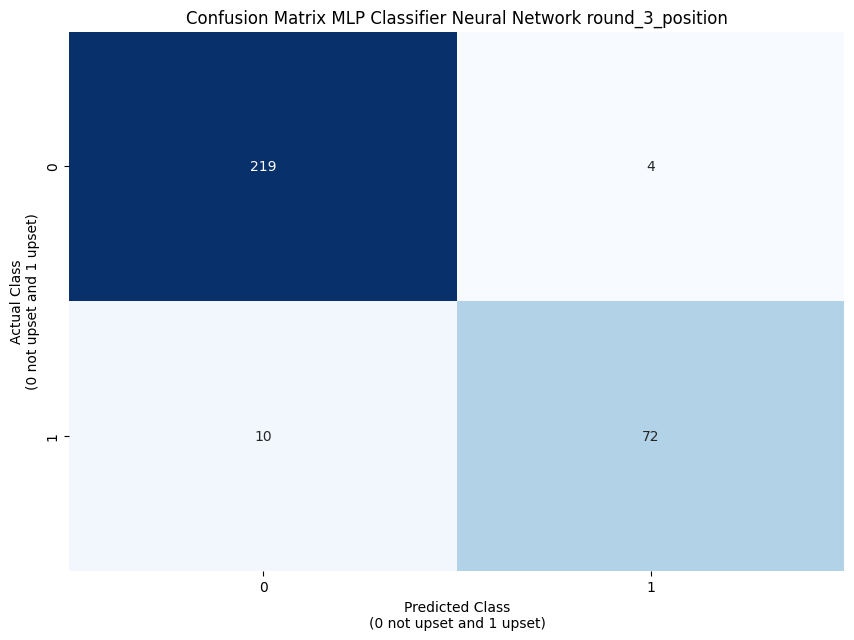

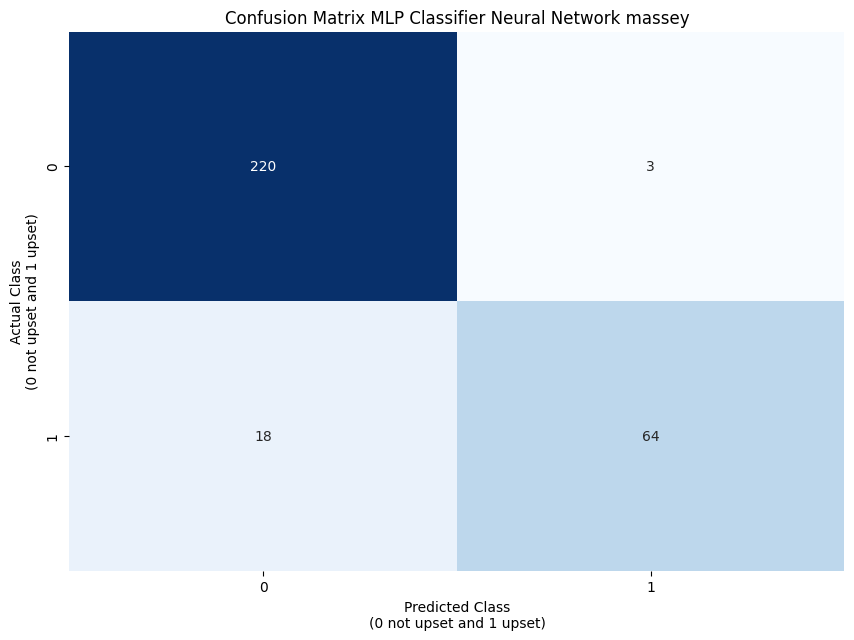

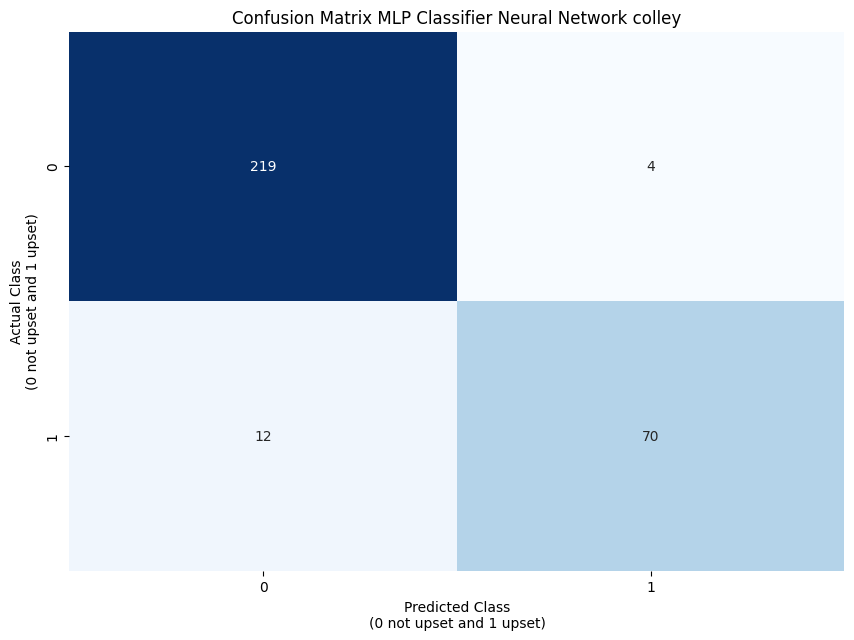

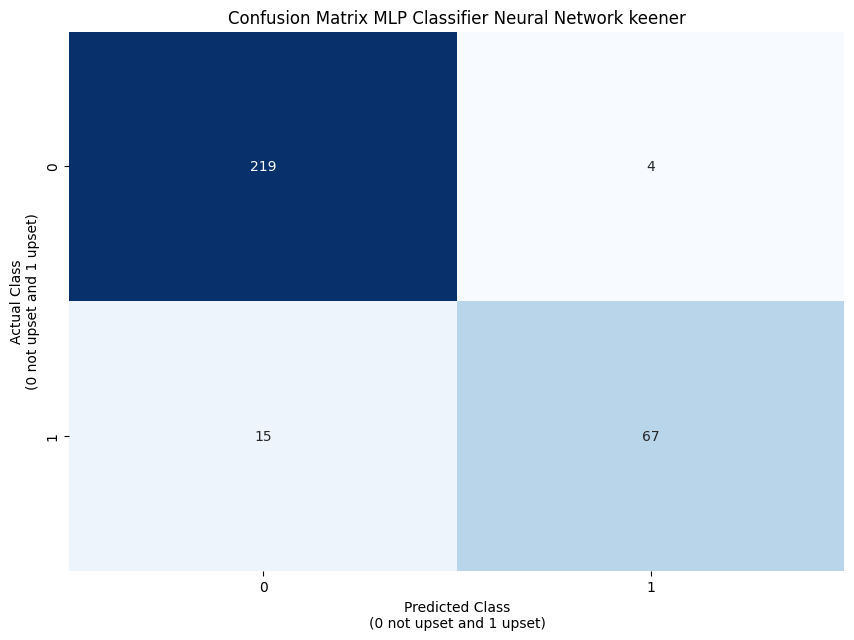

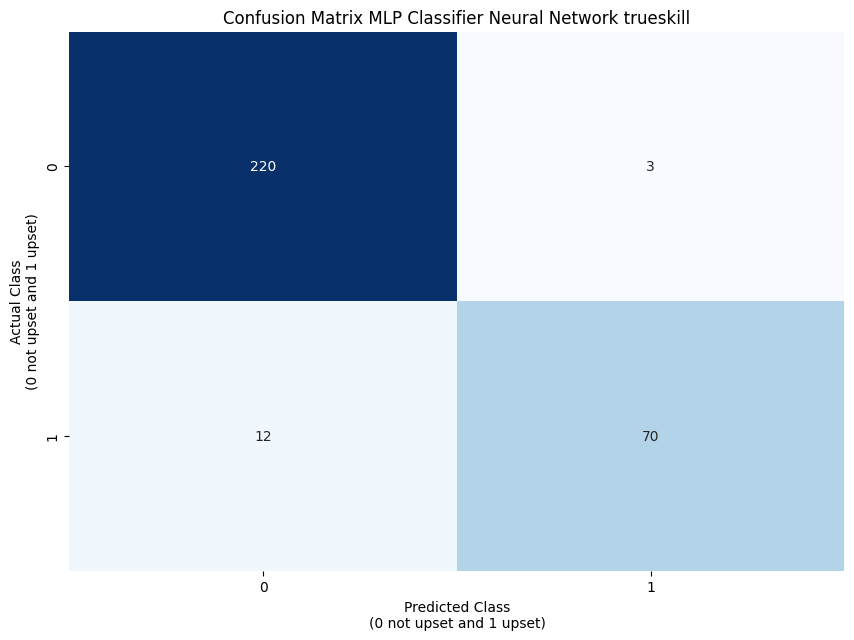

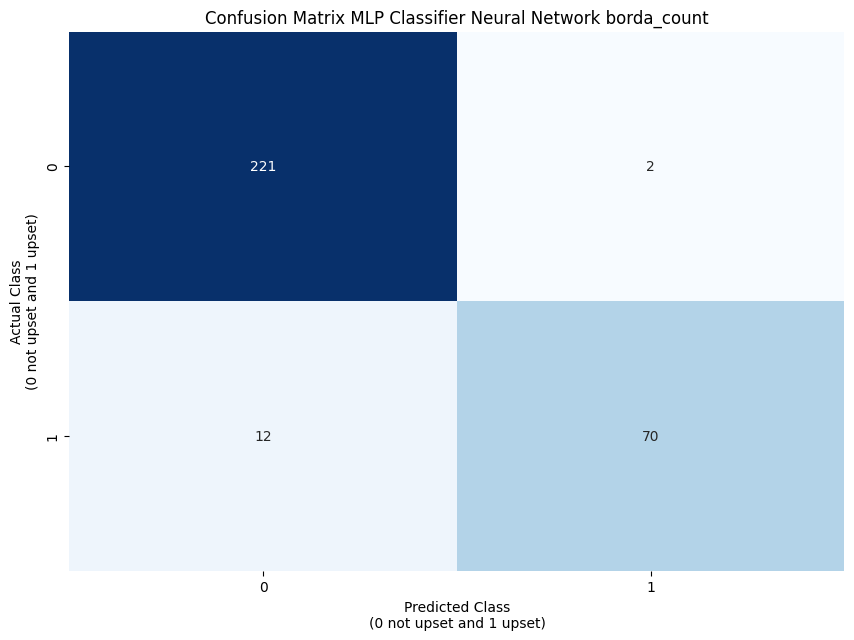

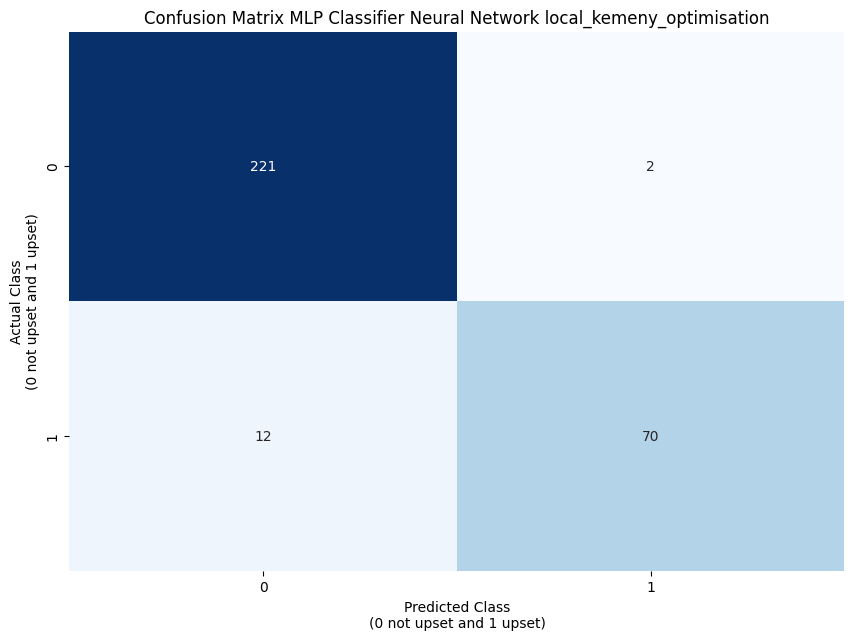

In [ ]:
# MCP Neural Network
model_name = "MLP Classifier Neural Network"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_nn = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Update preprocessor with current features
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features),
                ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
            ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=random_state))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        print(f"\nFold {fold}")
        print("Preprocessed Train data:")
        display(pd.concat([X_train_preprocessed_df, y_train], axis=1))
        print("\nPreprocessed Test data:")
        display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df= create_model_results_df(all_y_true, all_y_pred, fold_accuracies, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_nn = all_results_df_nn.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_nn)


MLP Classifier Neural Network with home advantage round_3_position
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.984
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.984
Fold 5 Accuracy: 0.967
Average Accuracy: 0.974
MLP Classifier Neural Network with home advantage massey
Fold 1 Accuracy: 0.951
Fold 2 Accuracy: 0.951
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.902
Fold 5 Accuracy: 0.934
Average Accuracy: 0.934
MLP Classifier Neural Network with home advantage colley
Fold 1 Accuracy: 0.951
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.918
Fold 4 Accuracy: 0.885
Fold 5 Accuracy: 0.902
Average Accuracy: 0.925
MLP Classifier Neural Network with home advantage keener
Fold 1 Accuracy: 0.951
Fold 2 Accuracy: 0.984
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.934
Fold 5 Accuracy: 0.885
Average Accuracy: 0.938
MLP Classifier Neural Network with home advantage trueskill
Fold 1 Accuracy: 0.967
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.902
Fold 4 Accuracy: 0.885
Fold 5 Accuracy: 0.918
Average Accuracy: 0.928
MLP Cla

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   MLP Classifier Neural Network with home advantage round_3_position  \
0                                               0.974                   
1                                               0.974                   
2                                             221.000                   
3                                               2.000                   
4                                               6.000                   
5                                              76.000                   
6                                               0.974                   
7                                               0.991                   
8                                               0.982                   
9                                               0.974                   
10                                              0.927                   
11                                              0.950                   
12                                              0.974                   
13                                              0.959                   
14                                              0.966                   
15                                              0.974                   
16                                              0.974                   
17                                              0.974                   

   MLP Classifier Neural Network with home advantage massey  \
0                                               0.934         
1                                               0.934         
2                                             216.000         
3                                               7.000         
4                                              13.000         
5                                              69.000         
6                                               0.943         
7                                               0.969         
8                                               0.956         
9                                               0.908         
10                                              0.841         
11                                              0.873         
12                                              0.926         
13                                              0.905         
14                                              0.915         
15                                              0.934         
16                                              0.934         
17                                              0.934         

   MLP Classifier Neural Network with home advantage colley  \
0                                               0.925         
1                                               0.925         
2                                             213.

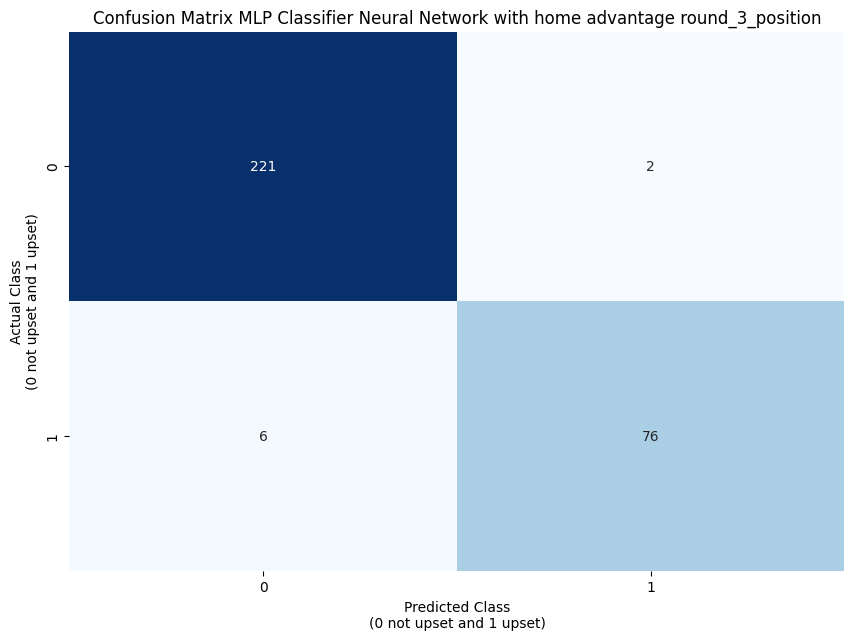

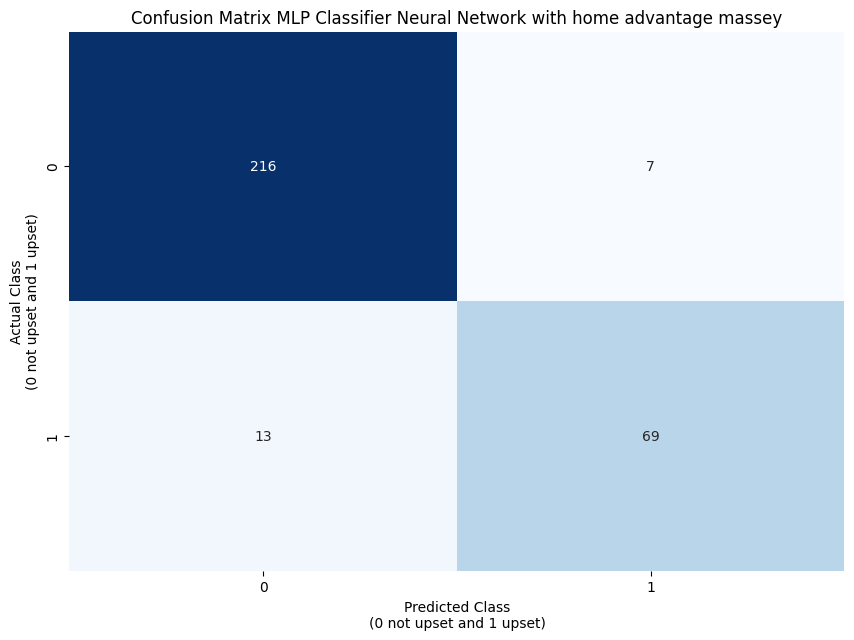

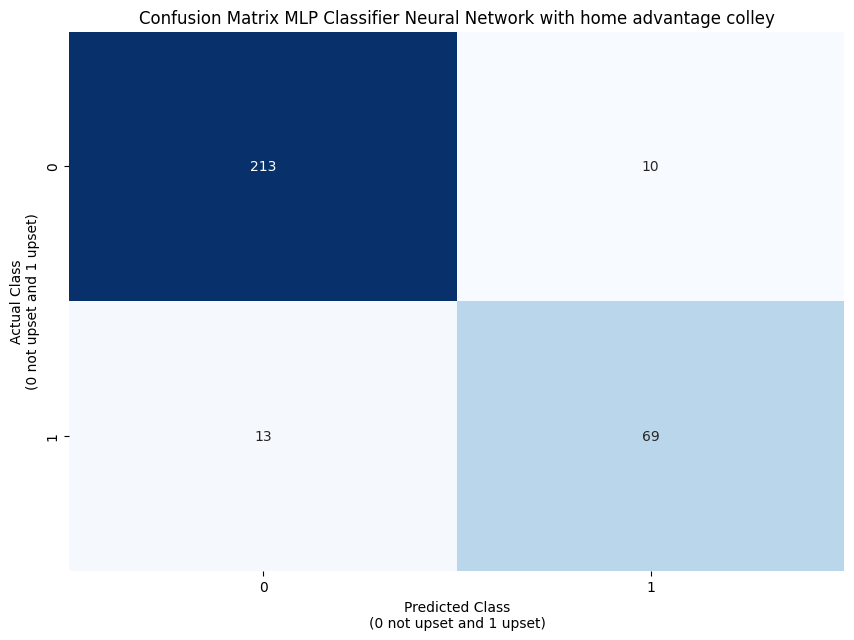

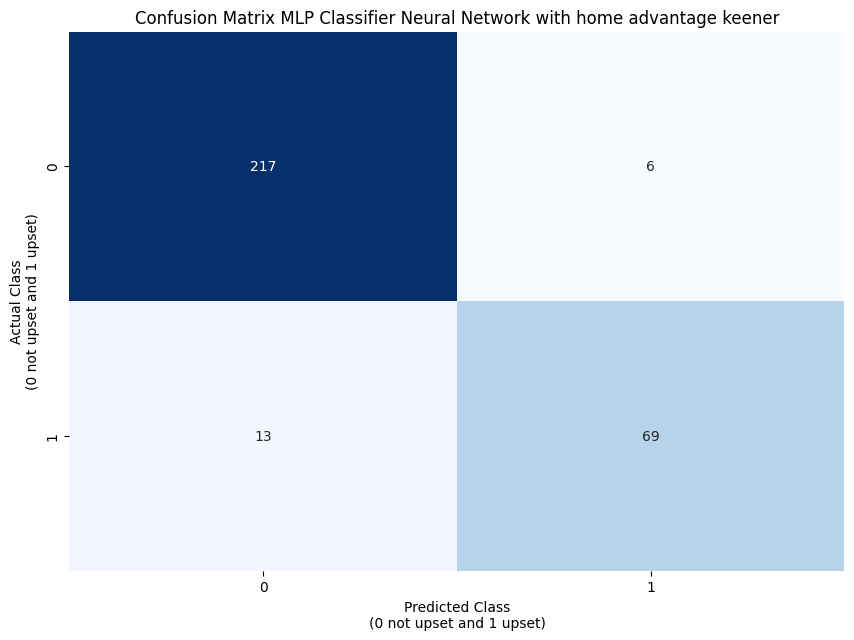

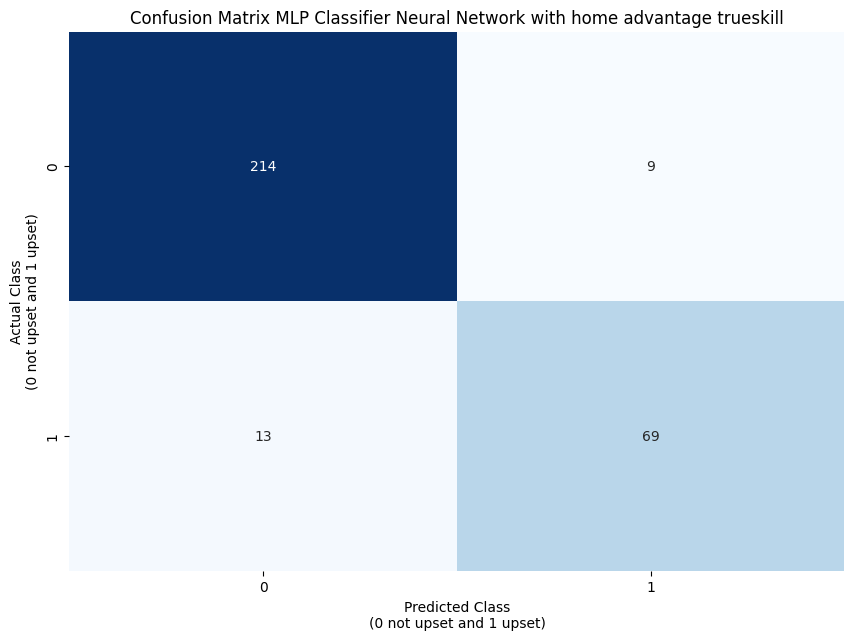

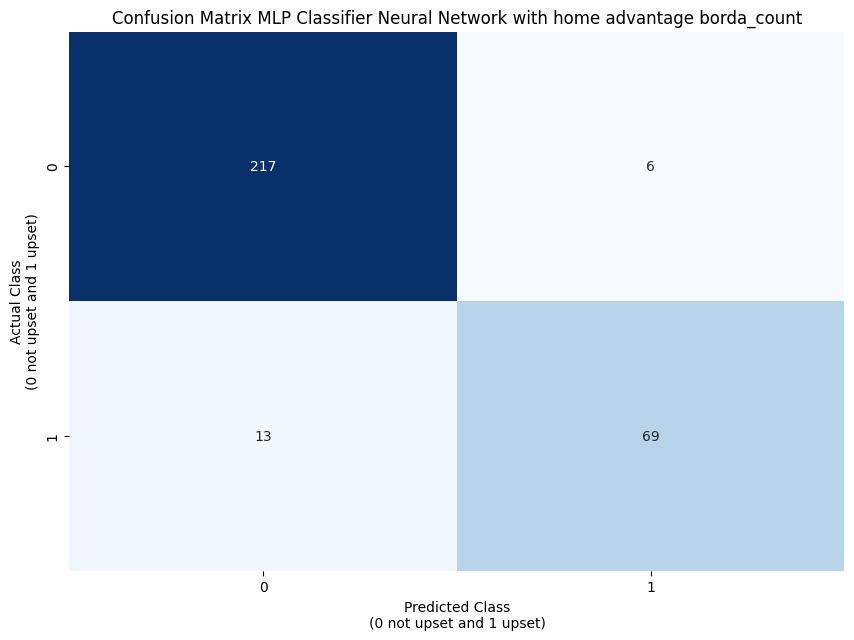

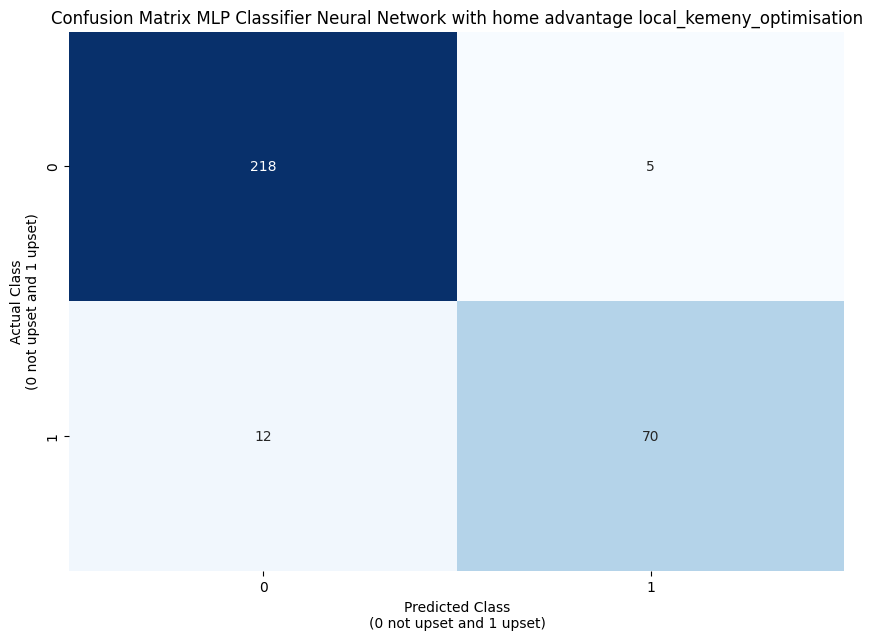

In [ ]:
# MCP Neural Network
model_name = "MLP Classifier Neural Network with home advantage"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_nnh = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features_with_ha = [home_advantage_column] + numeric_features

        # Update preprocessor with current features
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features_with_ha),
                ('cat', categorical_transformer, categorical_features),
                ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
            ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)


        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=random_state))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(pd.concat([X_train_preprocessed_df, y_train], axis=1))
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df= create_model_results_df(all_y_true, all_y_pred, fold_accuracies, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_nnh = all_results_df_nnh.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_nnh)


In [ ]:
all_results_df_lr = all_results_df_slrh.merge(all_results_df_slr, on=['metric_id', 'metric'], how='outer')
all_results_df_slnn = all_results_df_nn.merge(all_results_df_lr, on=['metric_id', 'metric'], how='outer')
all_results_df = all_results_df_nnh.merge(all_results_df_slnn, on=['metric_id', 'metric'], how='outer')
display(all_results_df)

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   MLP Classifier Neural Network with home advantage round_3_position  \
0                                               0.974                   
1                                               0.974                   
2                                             221.000                   
3                                               2.000                   
4                                               6.000                   
5                                              76.000                   
6                                               0.974                   
7                                               0.991                   
8                                               0.982                   
9                                               0.974                   
10                                              0.927                   
11                                              0.950                   
12                                              0.974                   
13                                              0.959                   
14                                              0.966                   
15                                              0.974                   
16                                              0.974                   
17                                              0.974                   

   MLP Classifier Neural Network with home advantage massey  \
0                                               0.934         
1                                               0.934         
2                                             216.000         
3                                               7.000         
4                                              13.000         
5                                              69.000         
6                                               0.943         
7                                               0.969         
8                                               0.956         
9                                               0.908         
10                                              0.841         
11                                              0.873         
12                                              0.926         
13                                              0.905         
14                                              0.915         
15                                              0.934         
16                                              0.934         
17                                              0.934         

   MLP Classifier Neural Network with home advantage colley  \
0                                               0.925         
1                                               0.925         
2                                             213.

In [ ]:
# Load updated all ranks df to Big Query so Borda Count can be subsequently queried in local kemeny optimisation
load_dataset_name = 'analysis_layer'
load_table_name = 'lr_ann_model_confusion_matrix_results'
full_table_name = f"{load_dataset_name}.{load_table_name}"
pandas_gbq.to_gbq(all_results_df, full_table_name, project_id='birkbeck-msc-project-422917', if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 810.81it/s]
